## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Reading the dataset
data = pd.read_csv('Customer-Churn-Records.csv')
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [4]:
# Checking for duplicate values
data.duplicated().sum()

0

In [5]:
# Checking for null values
data.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [6]:
# Checking for no. of unique values in each column
data.nunique()

RowNumber             10000
CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Complain                  2
Satisfaction Score        5
Card Type                 4
Point Earned            785
dtype: int64

In [7]:
# Unique values in categorical columns
print('Geography          : ', data['Geography'].unique())
print('Gender             : ', data['Gender'].unique())
print('Tenure             : ', data['Tenure'].unique())
print('No. of Products    : ', data['NumOfProducts'].unique())
print('Has Credit Card?   : ', data['HasCrCard'].unique())
print('Is Active Member?  : ', data['IsActiveMember'].unique())
print('Is Exited?         : ', data['Exited'].unique())
print('Complain           : ', data['Complain'].unique())
print('Satisfaction Score : ', data['Satisfaction Score'].unique())
print('Card Type          : ', data['Card Type'].unique())

Geography          :  ['France' 'Spain' 'Germany']
Gender             :  ['Female' 'Male']
Tenure             :  [ 2  1  8  7  4  6  3 10  5  9  0]
No. of Products    :  [1 3 2 4]
Has Credit Card?   :  [1 0]
Is Active Member?  :  [1 0]
Is Exited?         :  [1 0]
Complain           :  [1 0]
Satisfaction Score :  [2 3 5 4 1]
Card Type          :  ['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']


In [8]:
data.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited      Complain  Satisfaction Score  \
count     10000.000000  10000.000000  10000.000000        10000.000000   
mean     100090.239881      0.203800      0.204400            3.013800   
std       57510.492818      0.402842      0.403283            1.405919   
min          11.580000      0.000000      0.000000            1.000000   
25%       51002.110000      0.000000      0.000000            2.000000   
50%      100193.915000      0.000000      0.000000            3.000000   
75%      149388.247500      0.000000      0.000000            4.000000   
max      199992.480000      1.000000      1.000000            5.000000   

       Point Earned  
count  10000.000000  
mean     606.515100  
std      225.924839  
min      119.000000  
25%      410.000000  
50%      605.000000  
75%      801.000000  
max     1000.000000

## Exploratory Data Analysis

In [9]:
plt.style.use('dark_background')

<AxesSubplot:>

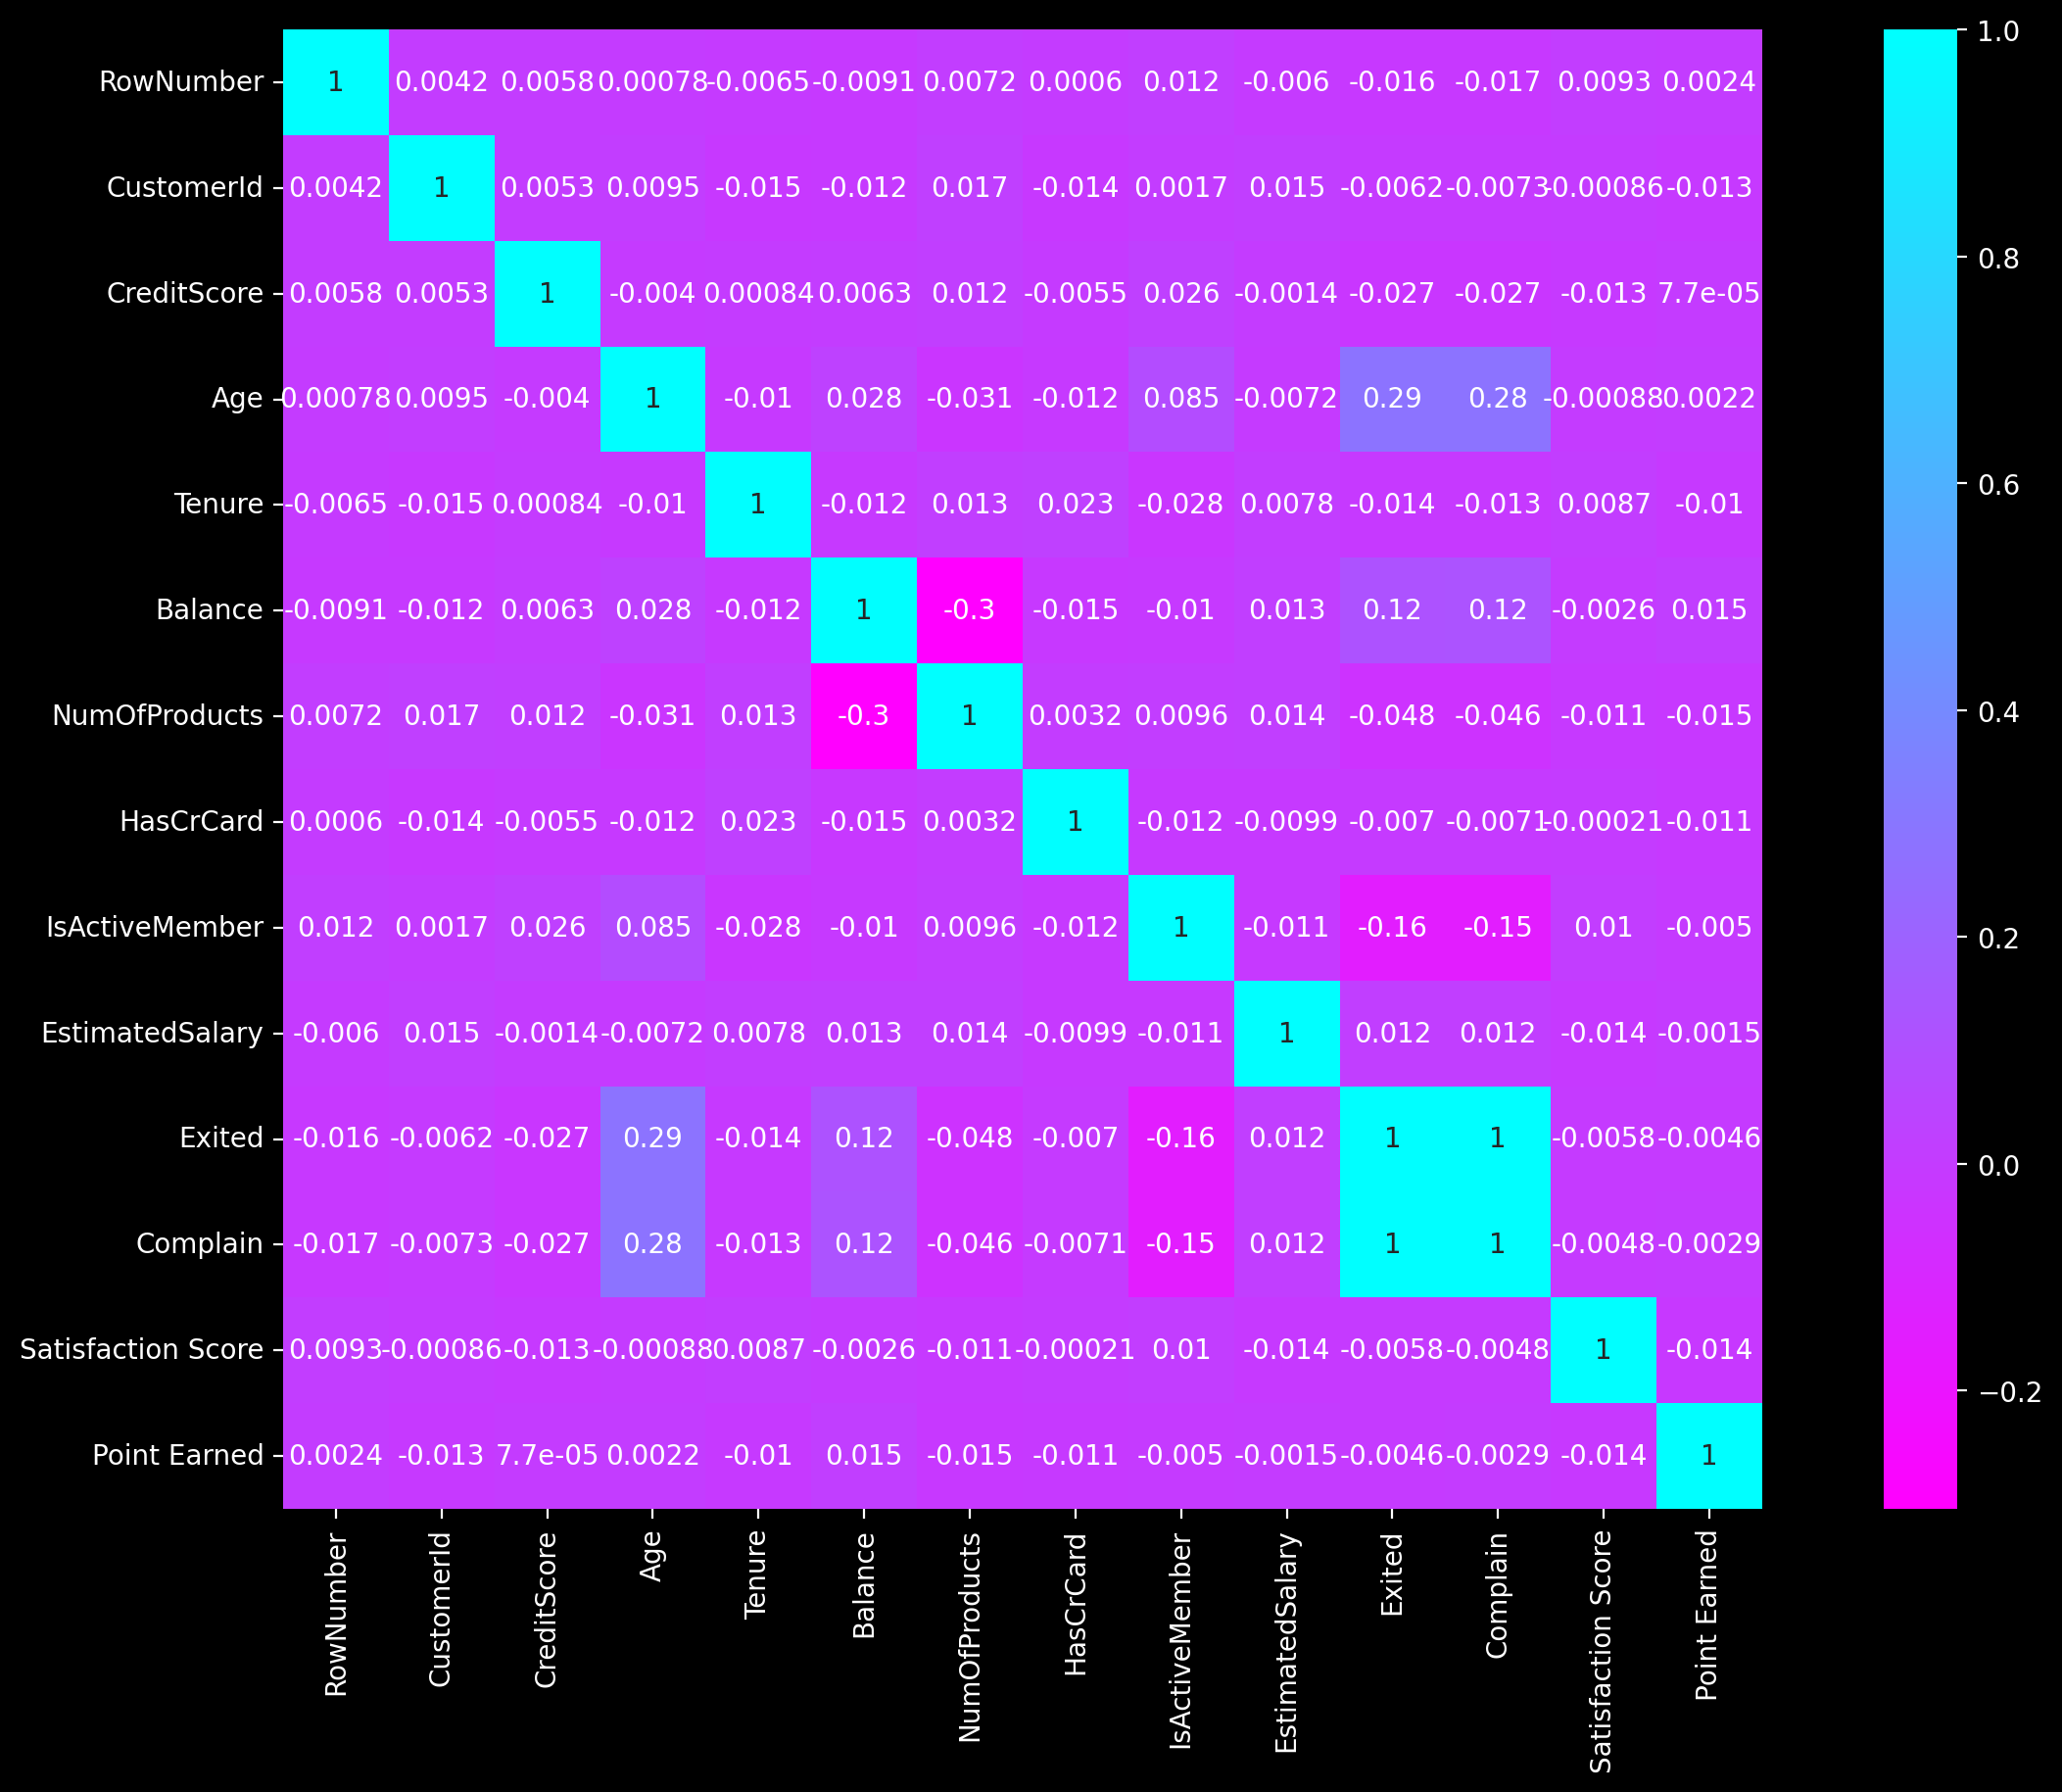

In [10]:
# Correlation Matrix
plt.figure(figsize = (16, 10), dpi = 200)
sns.heatmap(data.corr(), annot = True, square = True, cmap = 'cool_r')

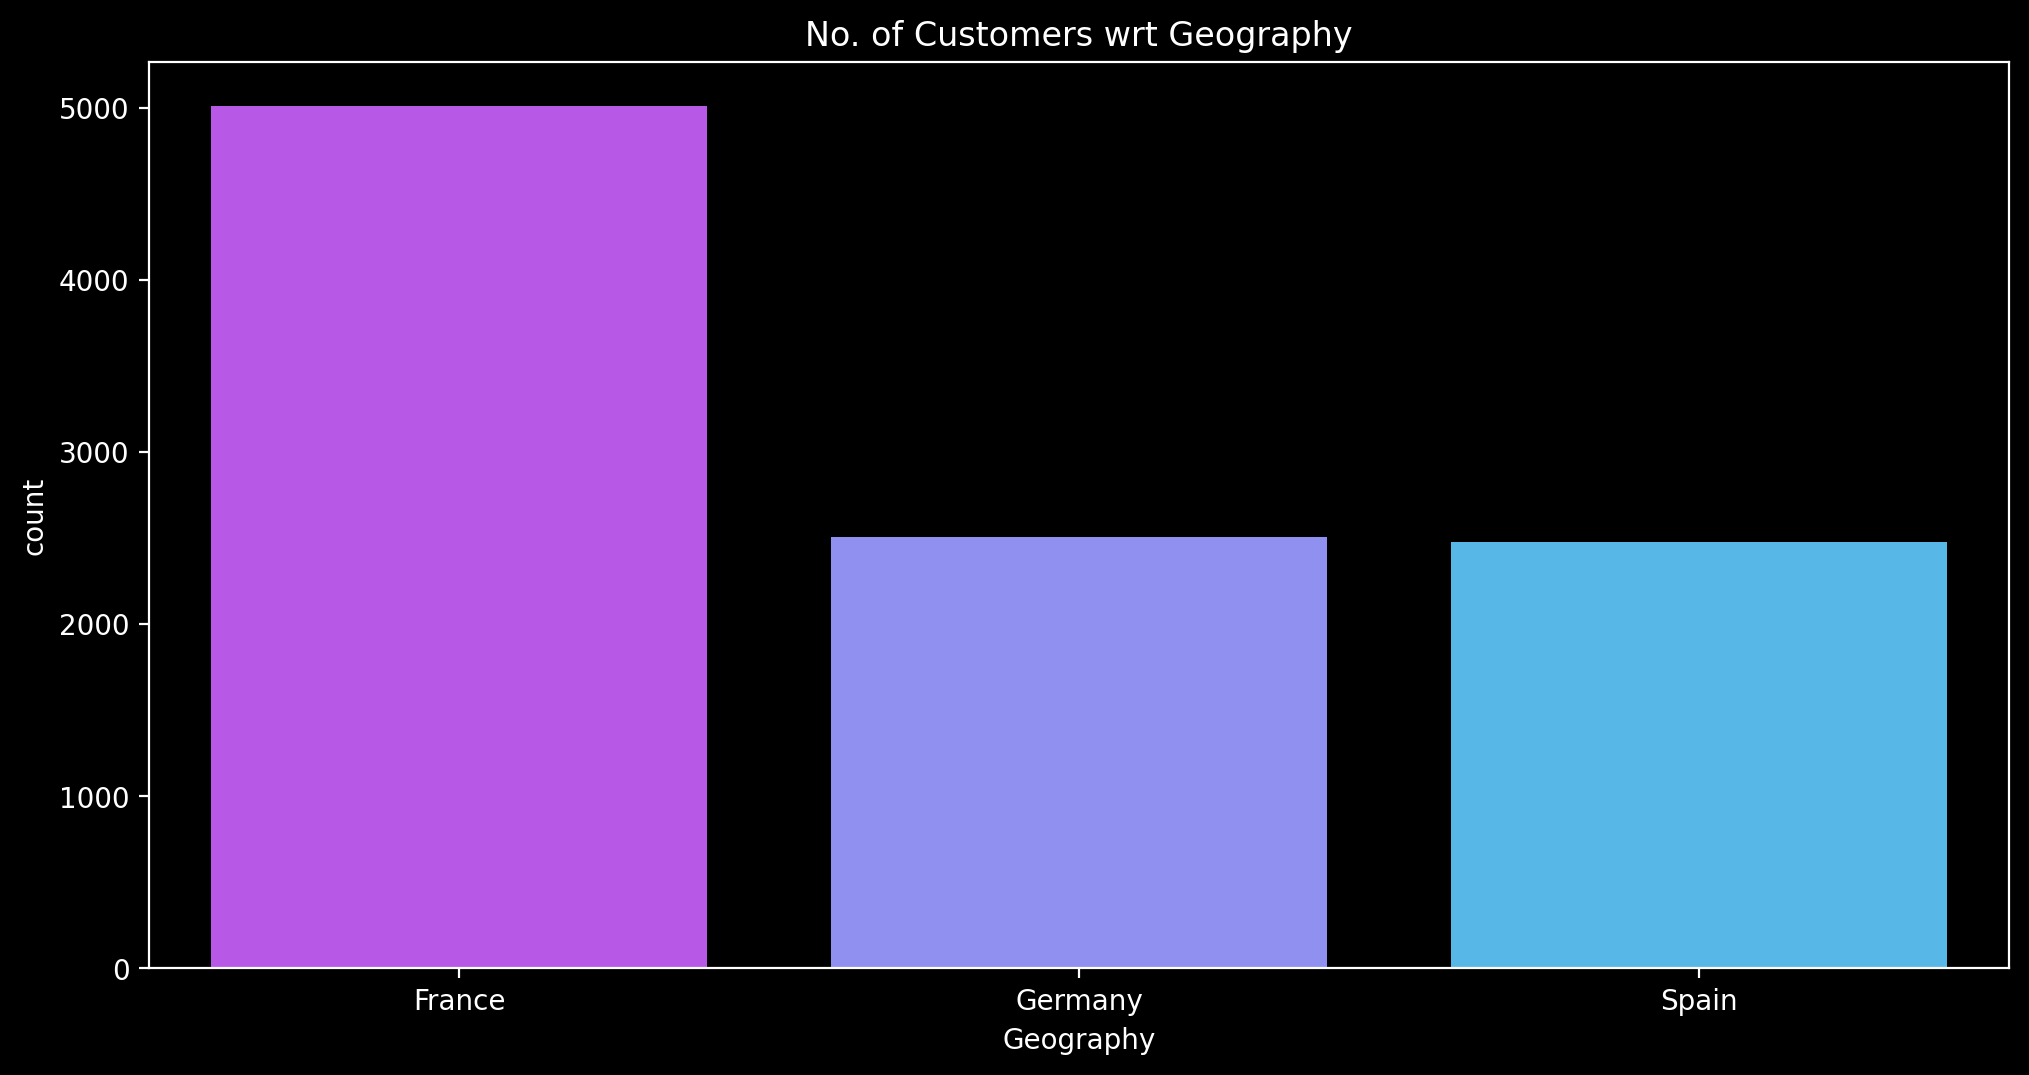

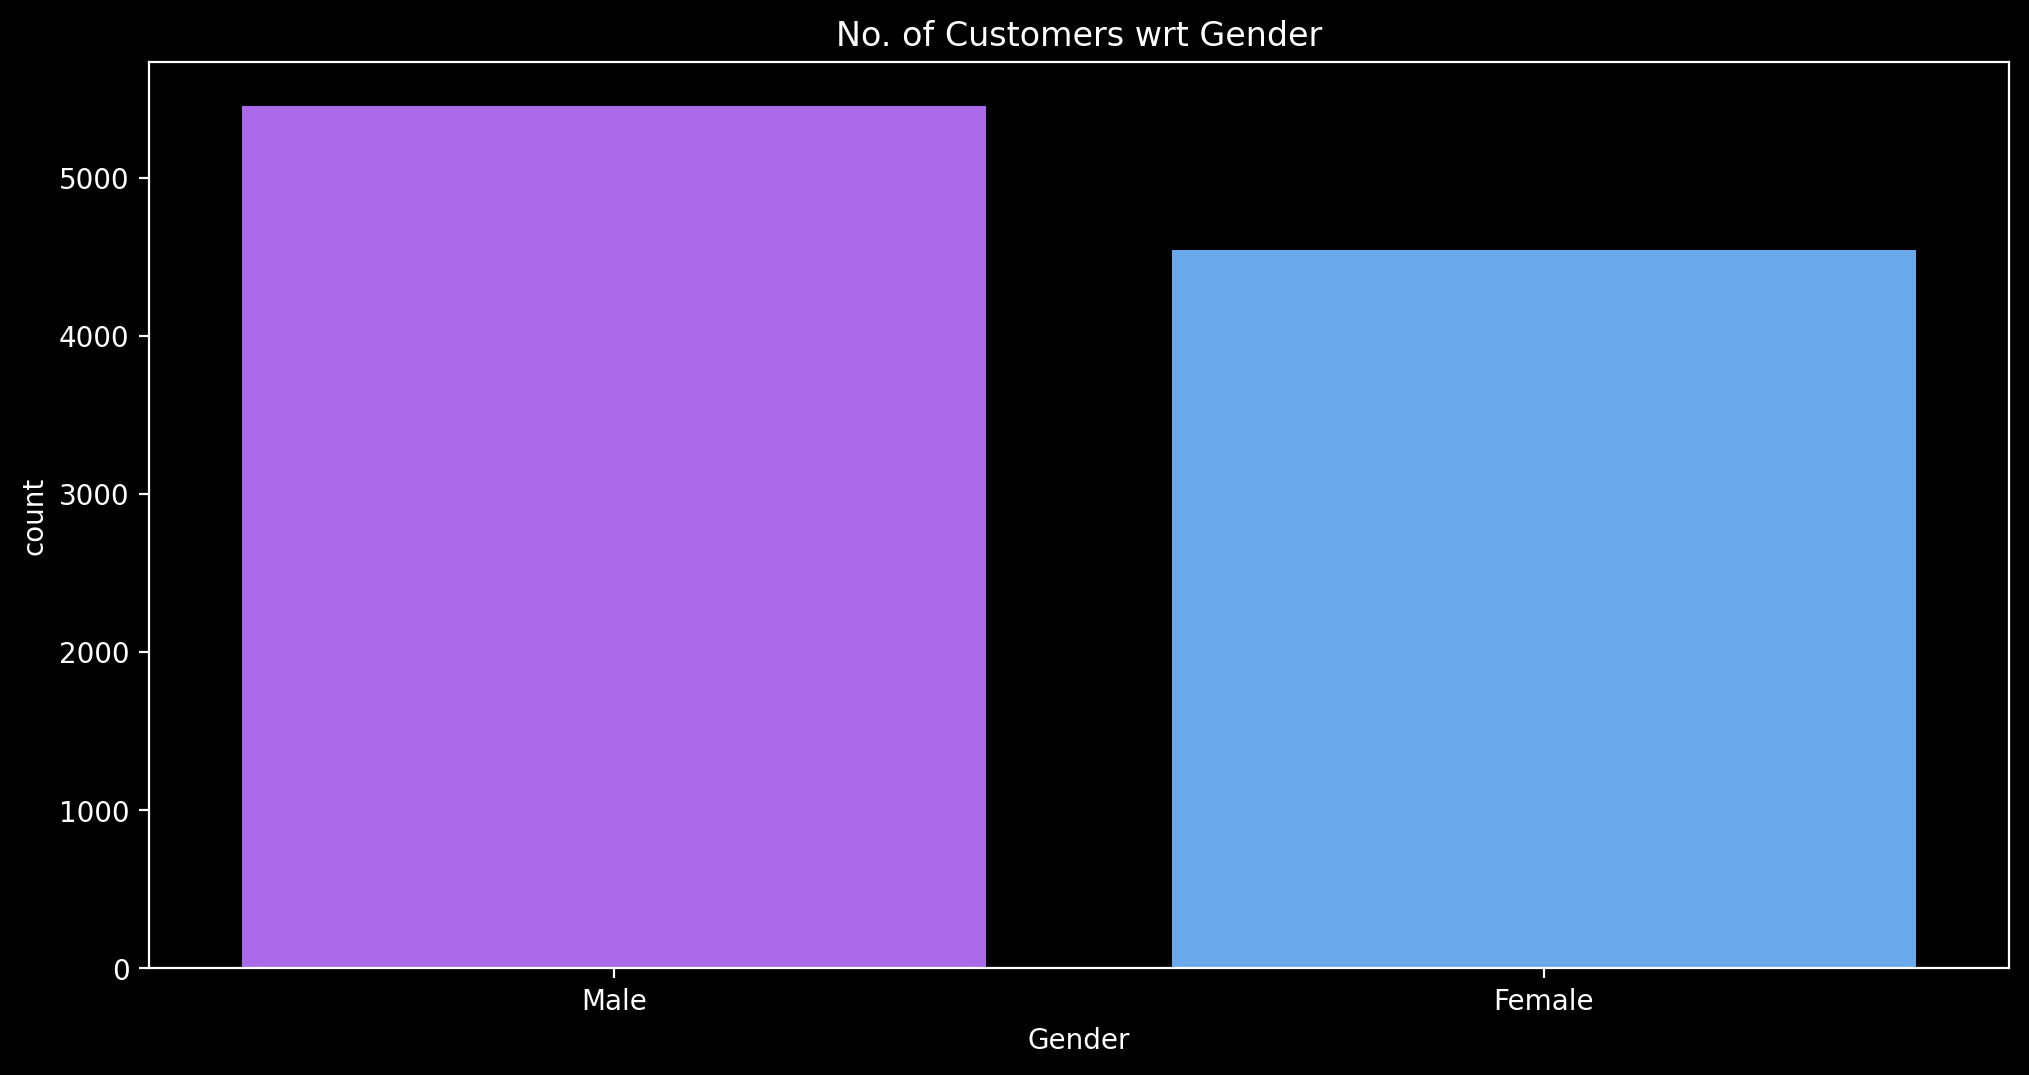

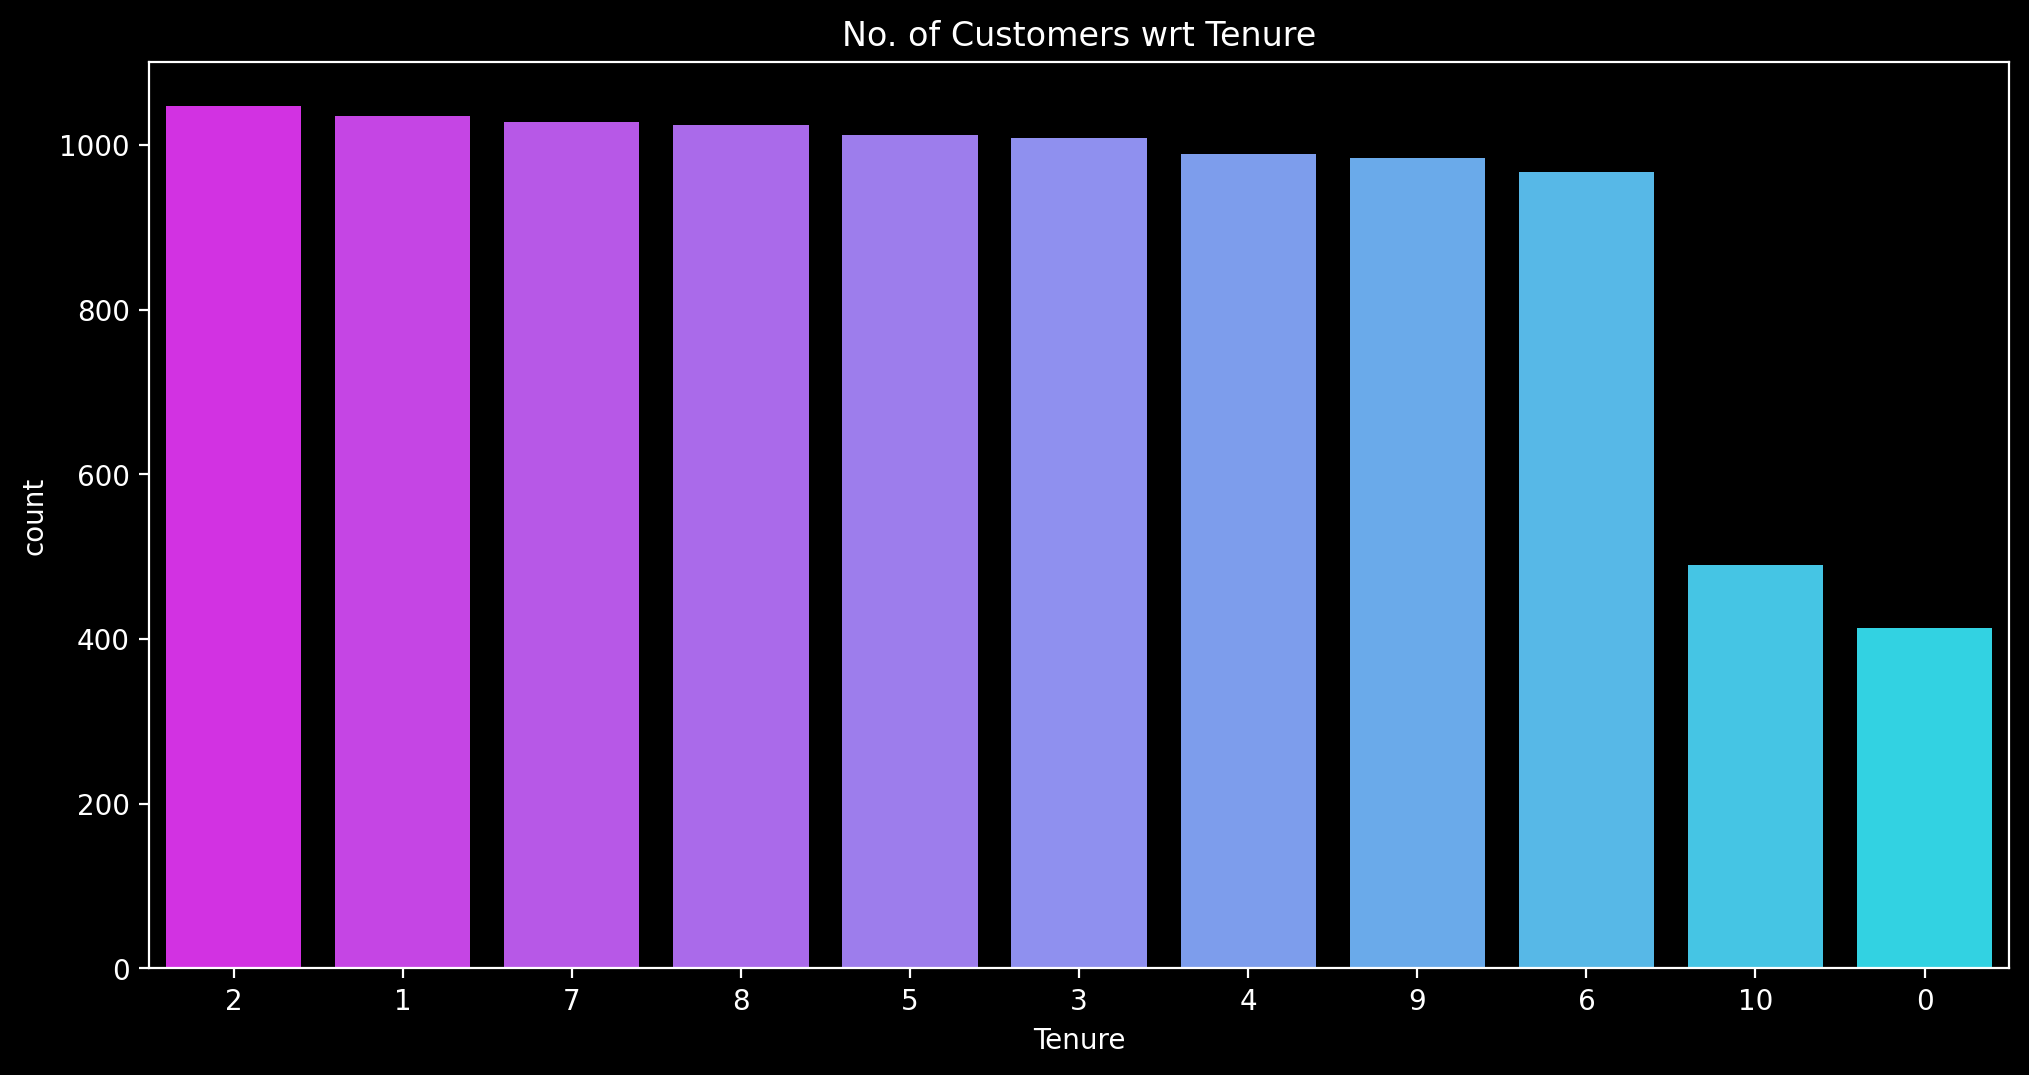

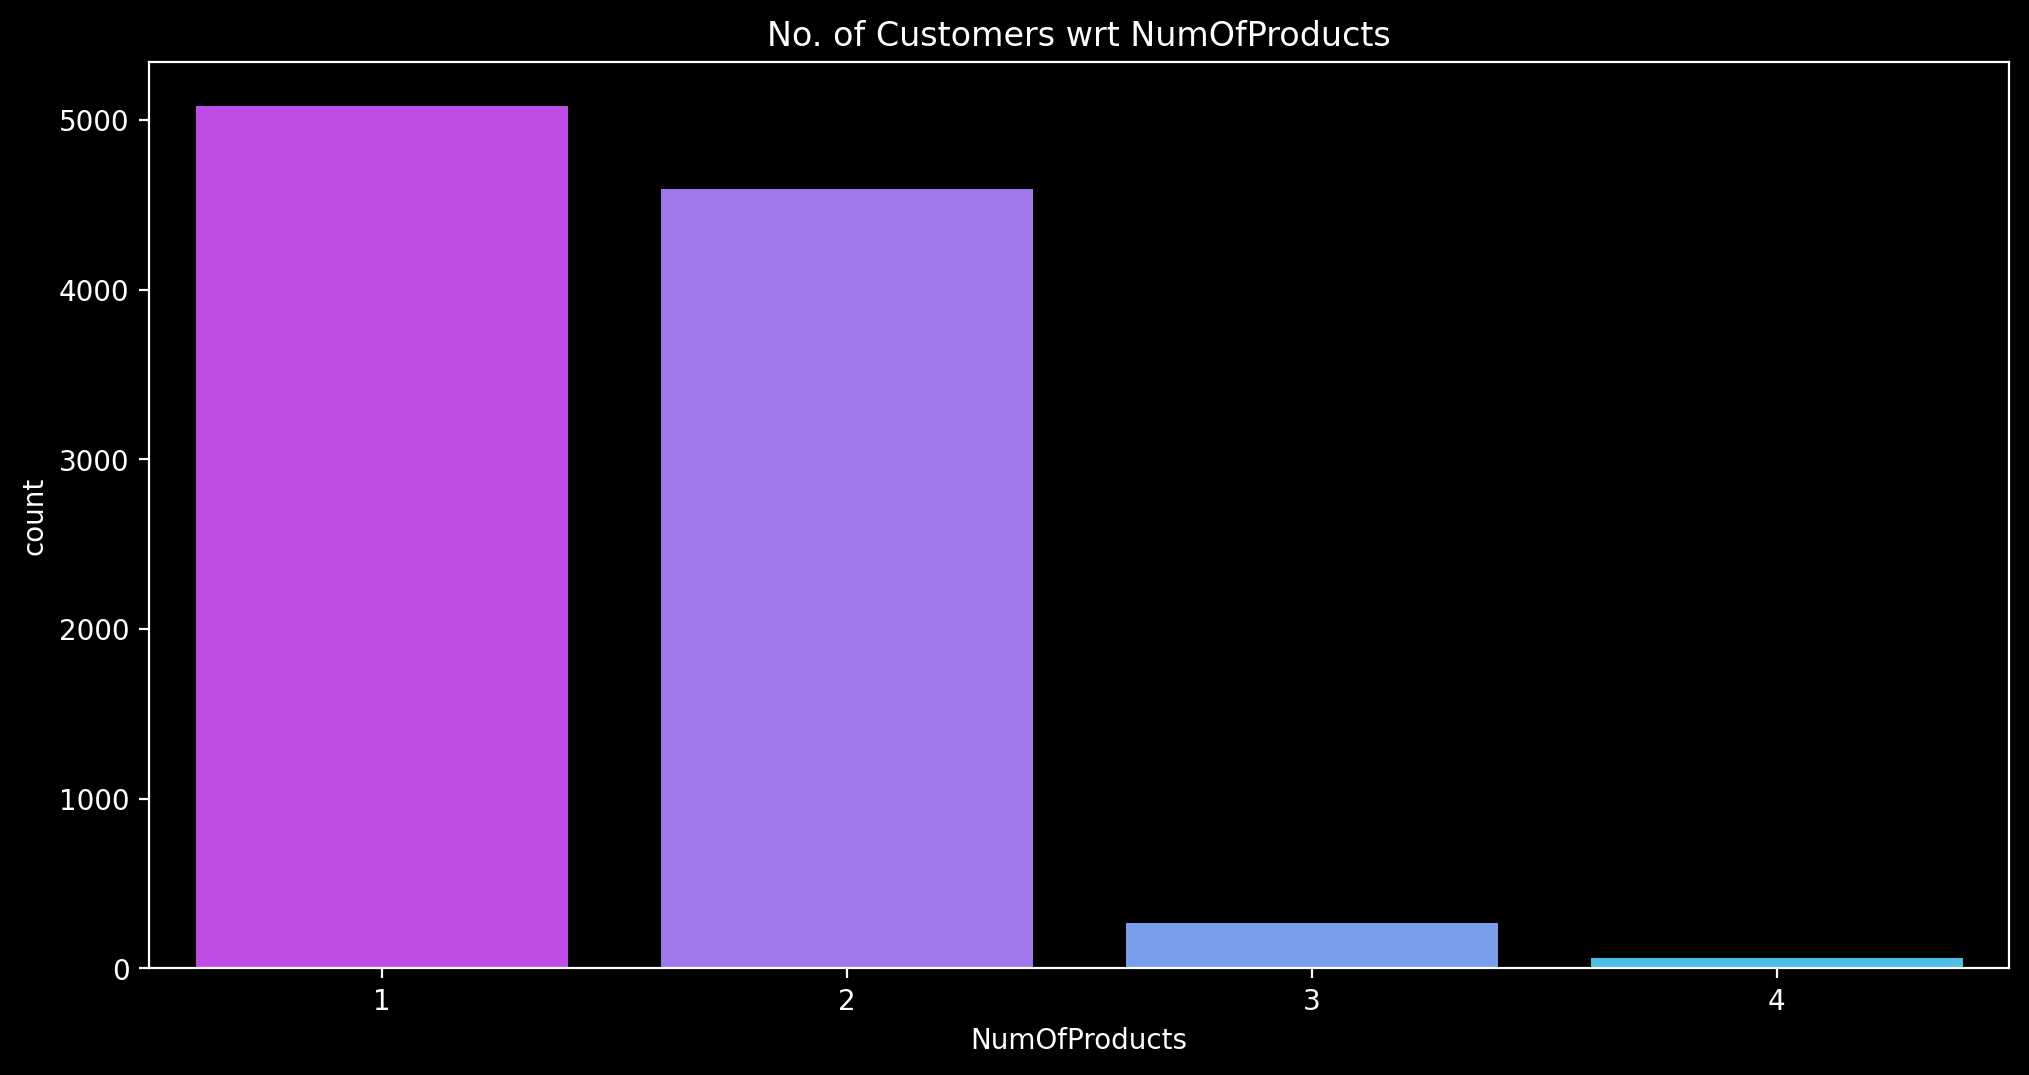

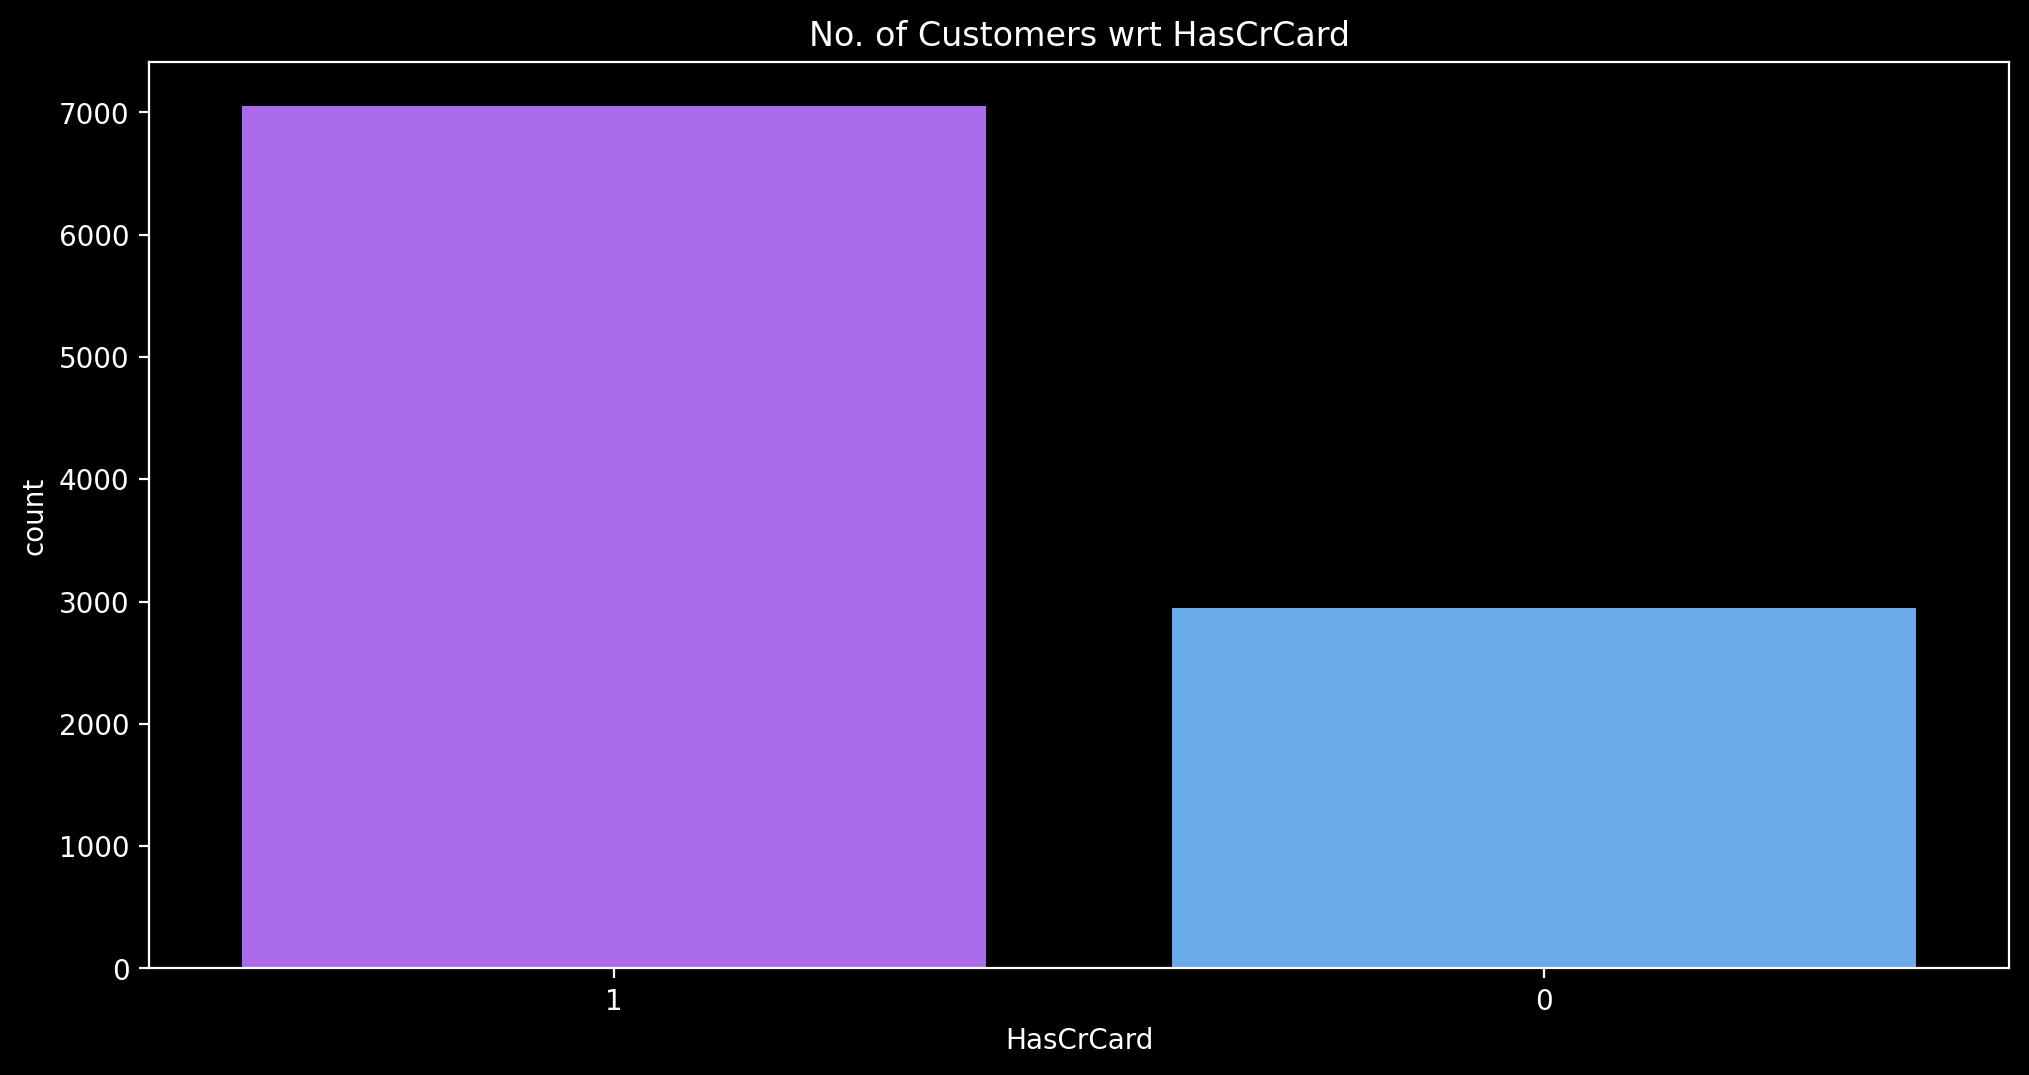

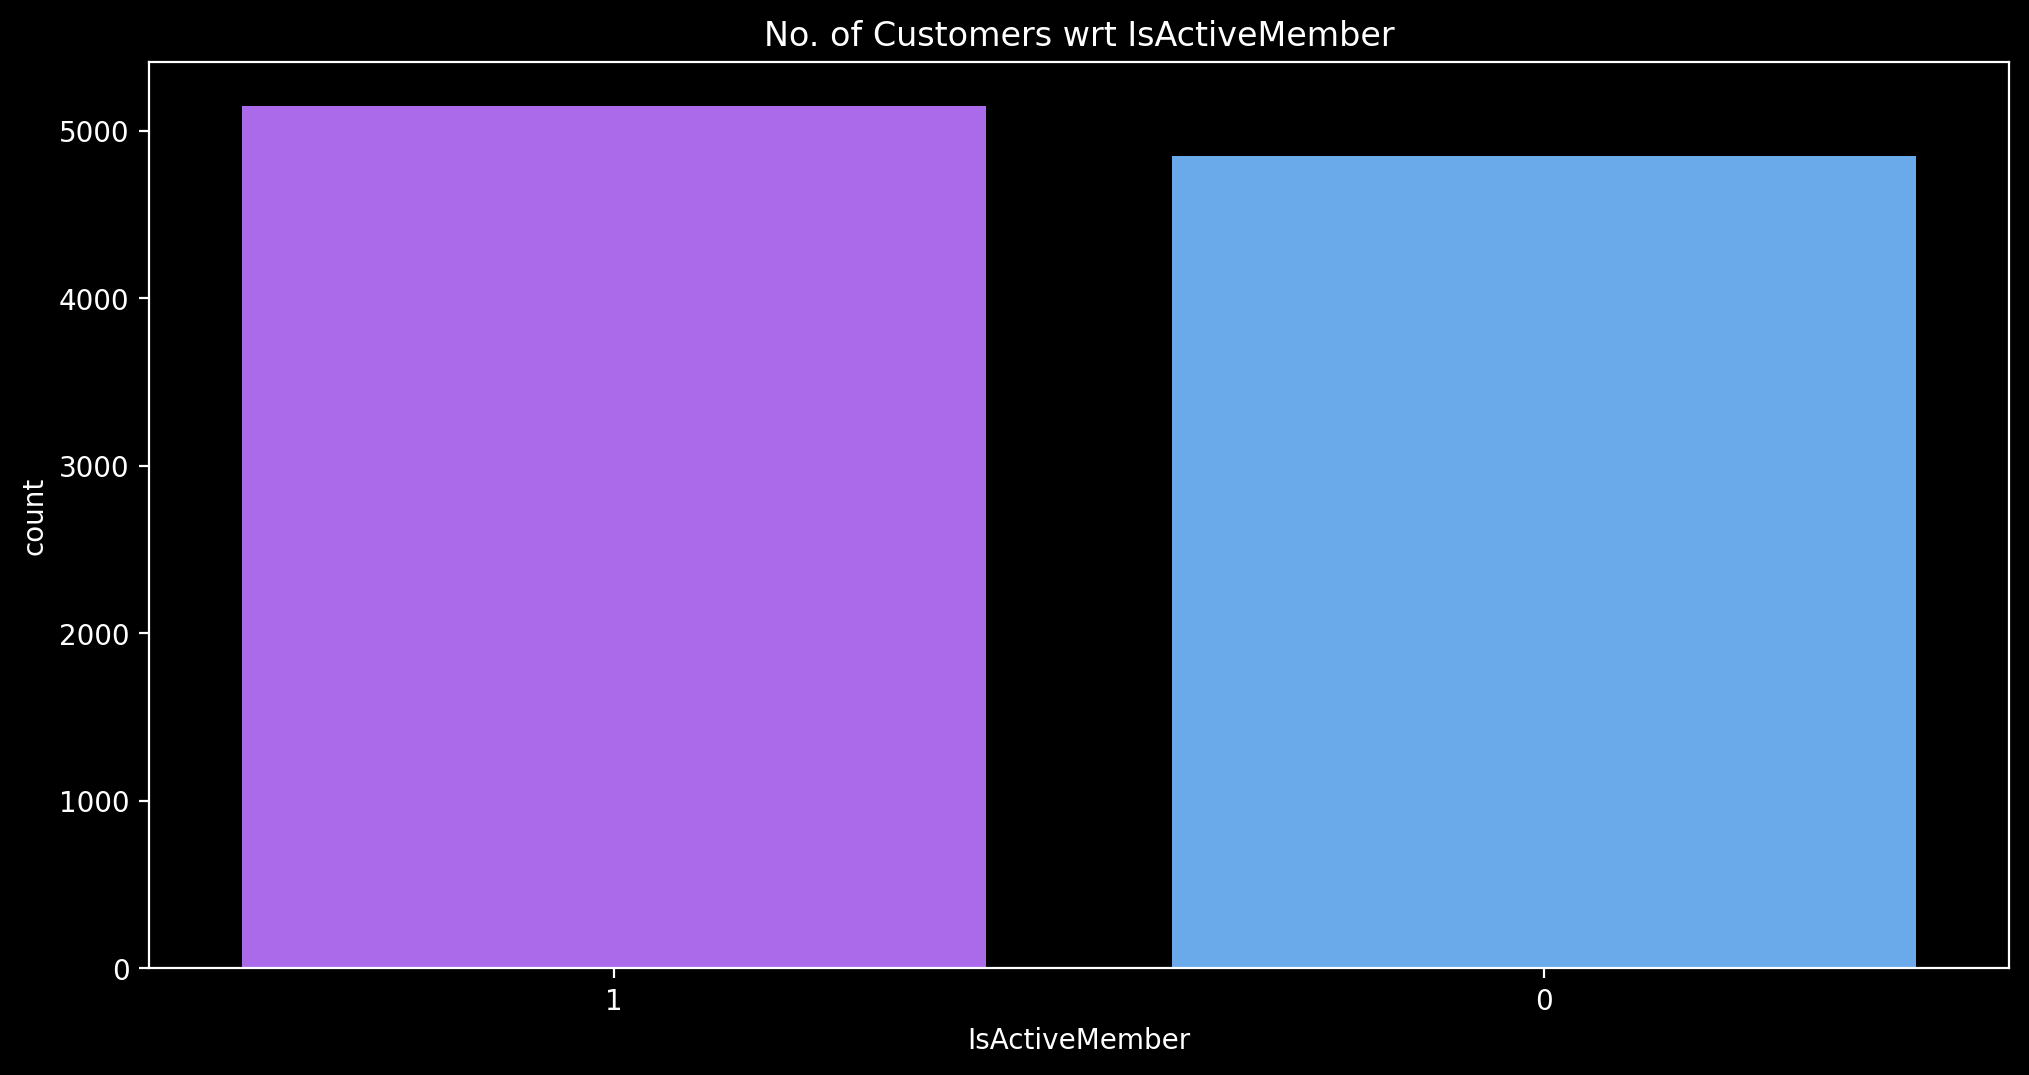

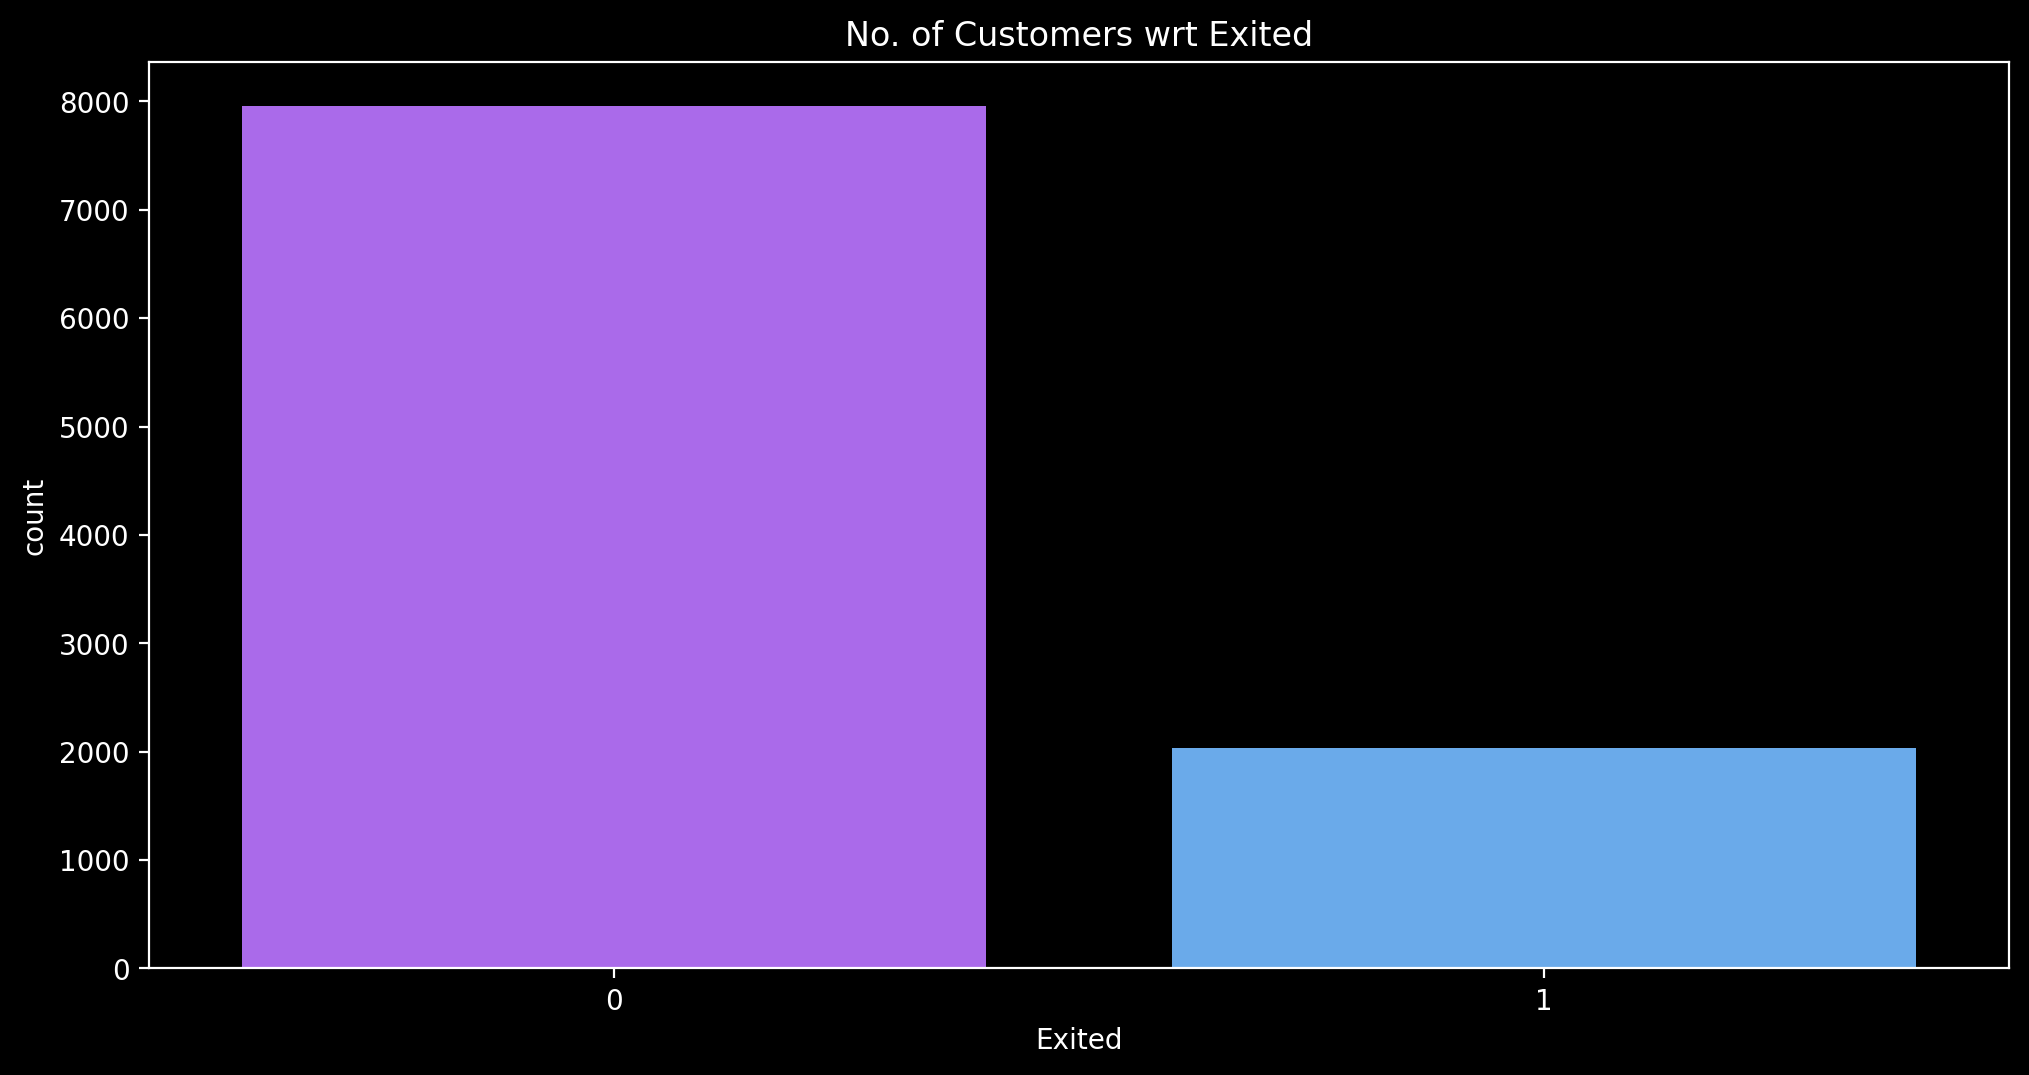

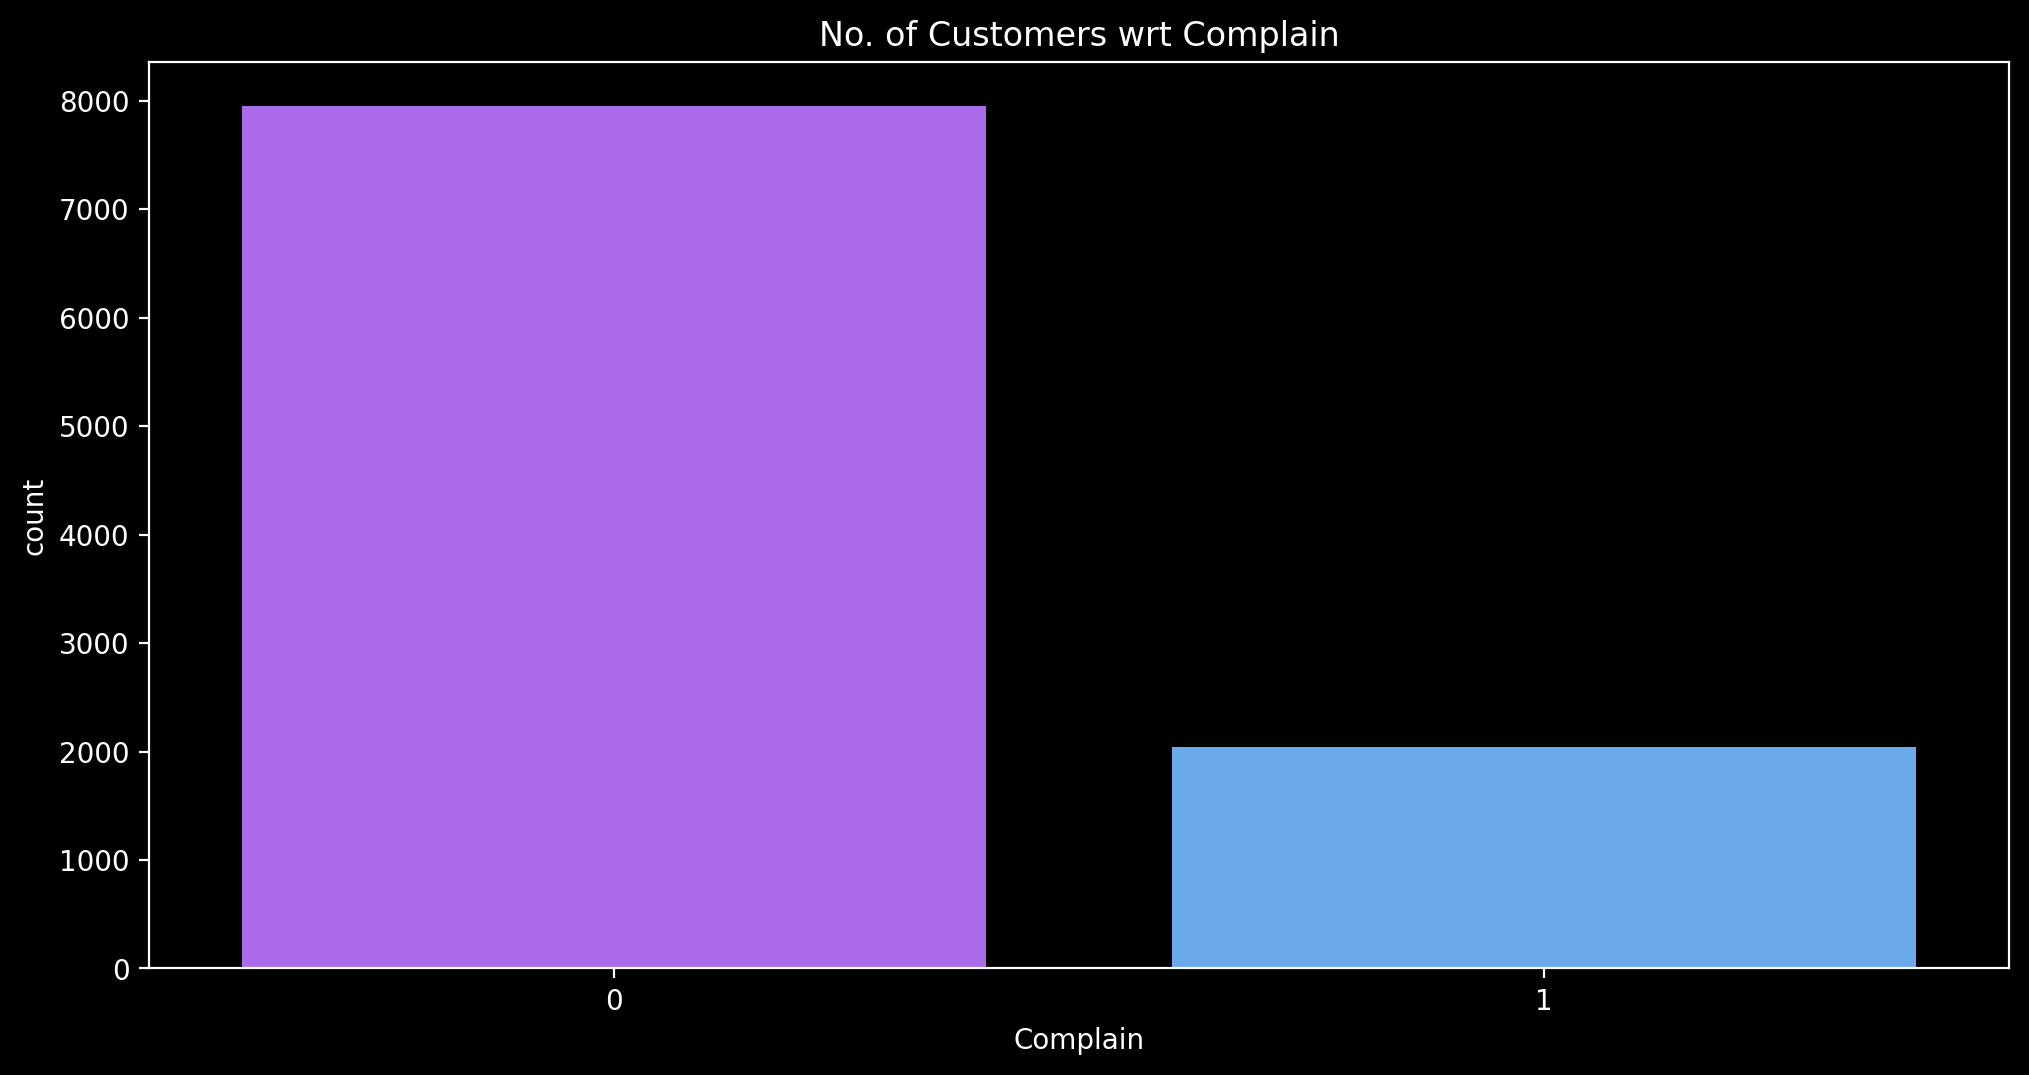

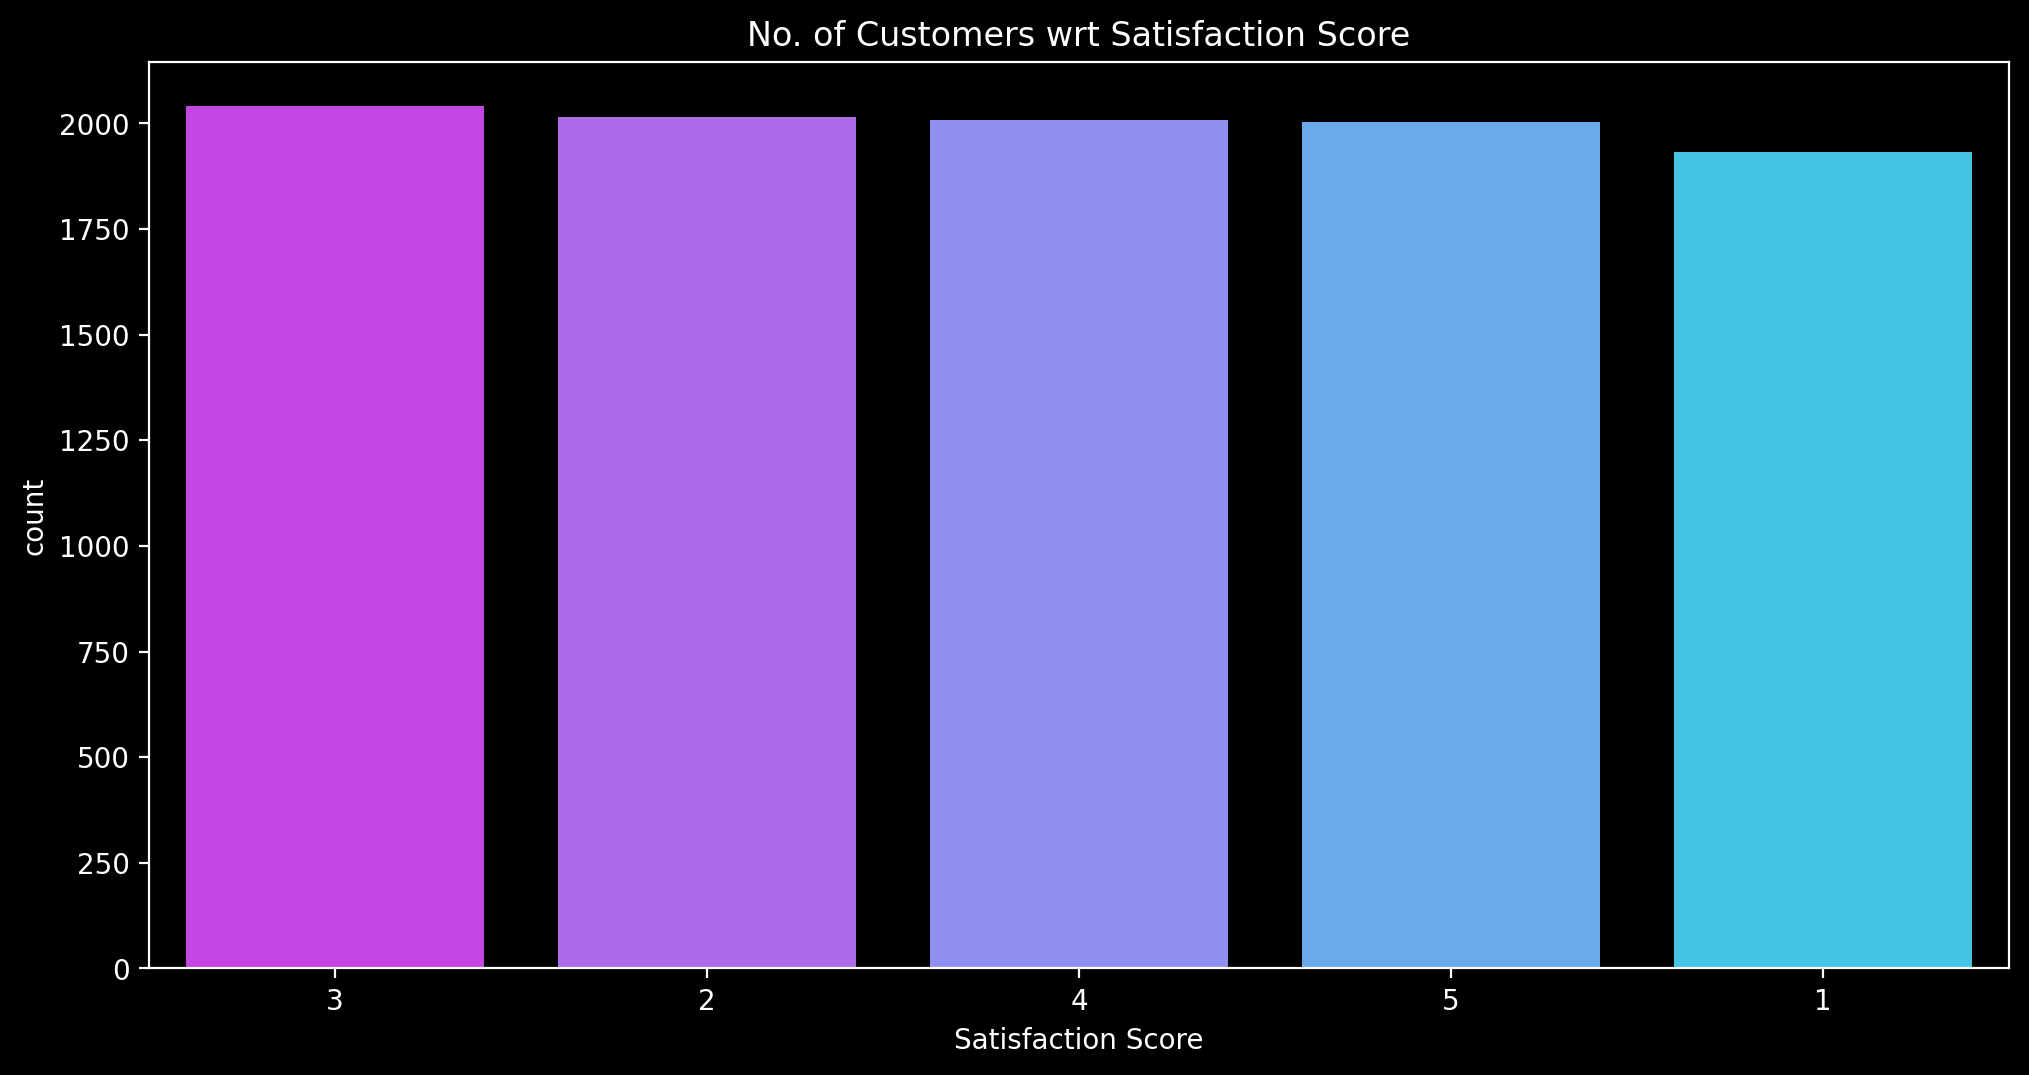

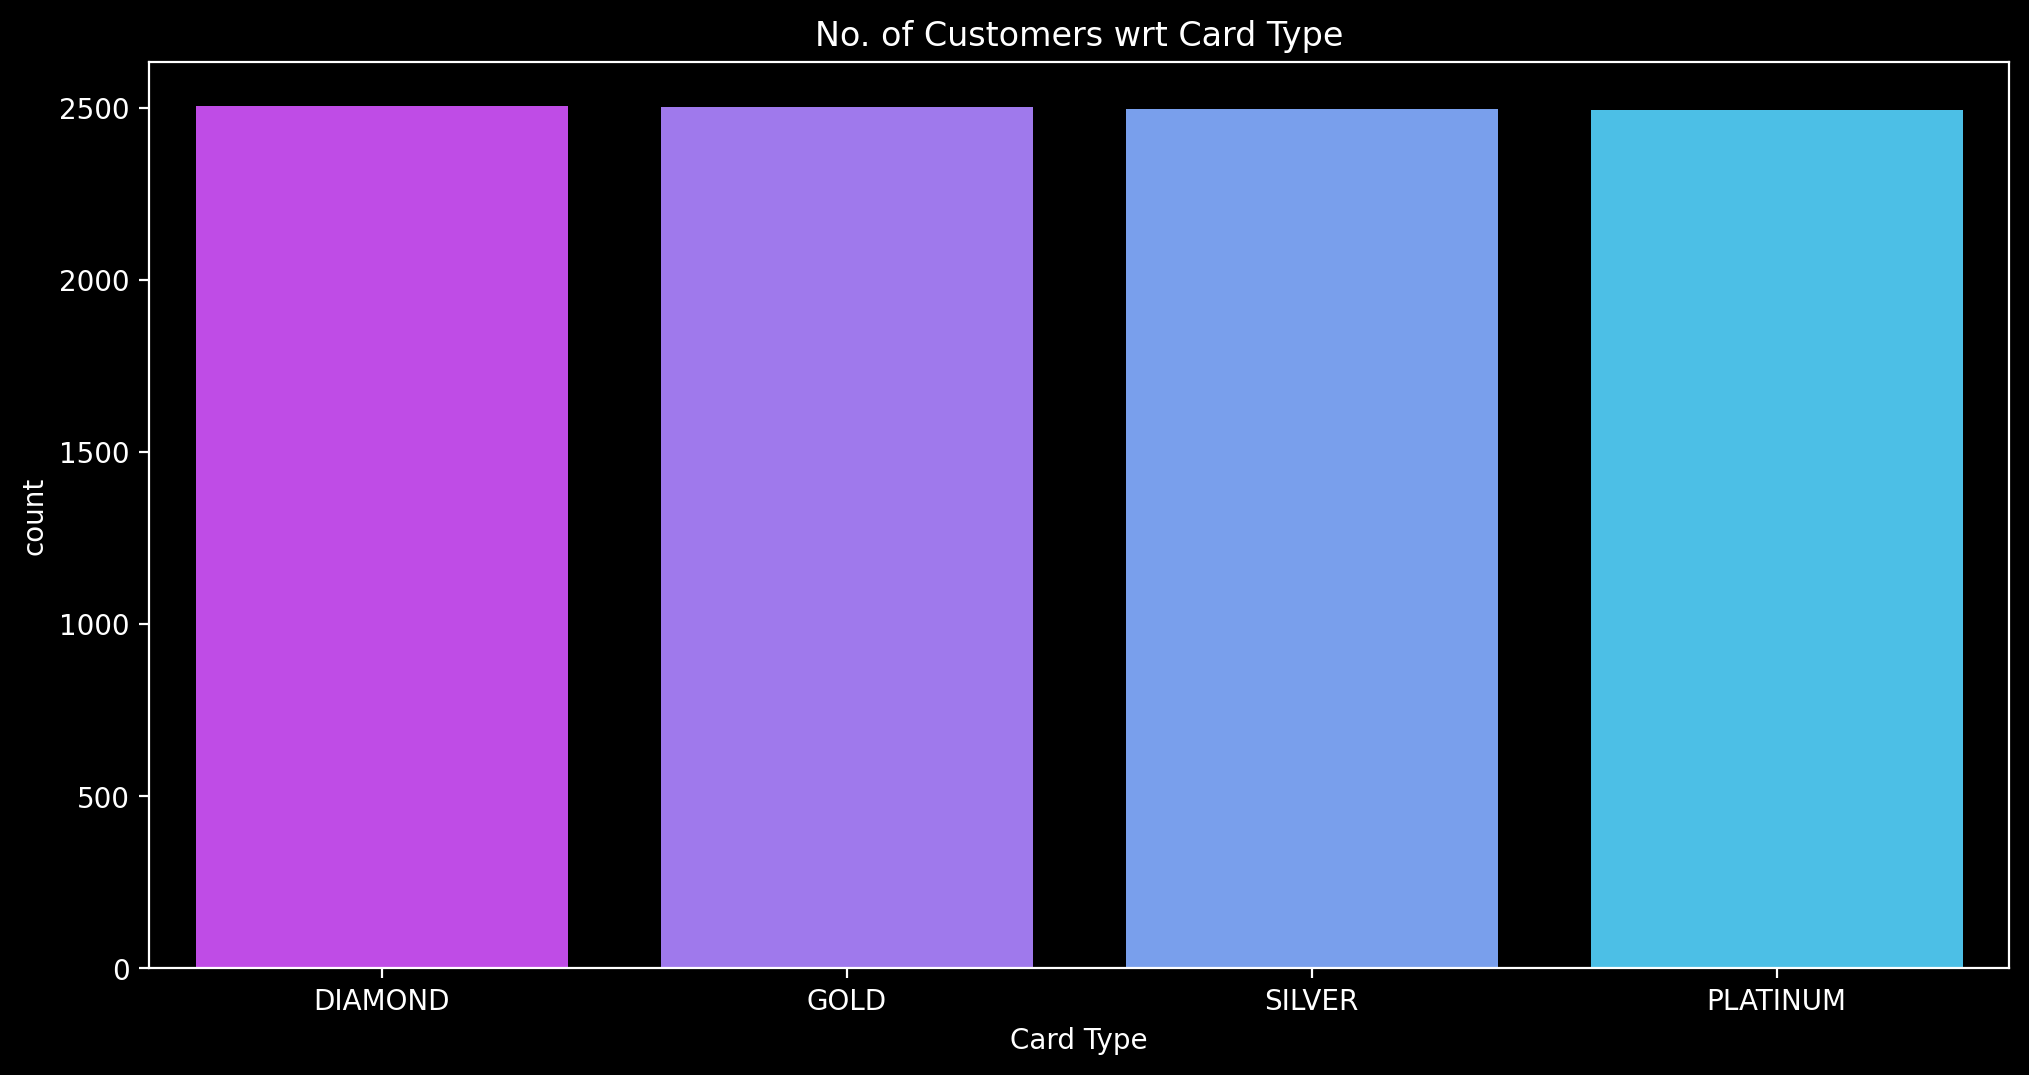

In [28]:
# Countplots
def countplot(x):
    for i in x:
        order = data[i].value_counts().sort_values(ascending = False).index
        plt.figure(figsize = (12, 6), dpi = 200)
        sns.countplot(i, data = data, order = order, palette = 'cool_r')
        plt.title('No. of Customers wrt {}'.format(i))
        plt.show()
        
countplot(['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type'])

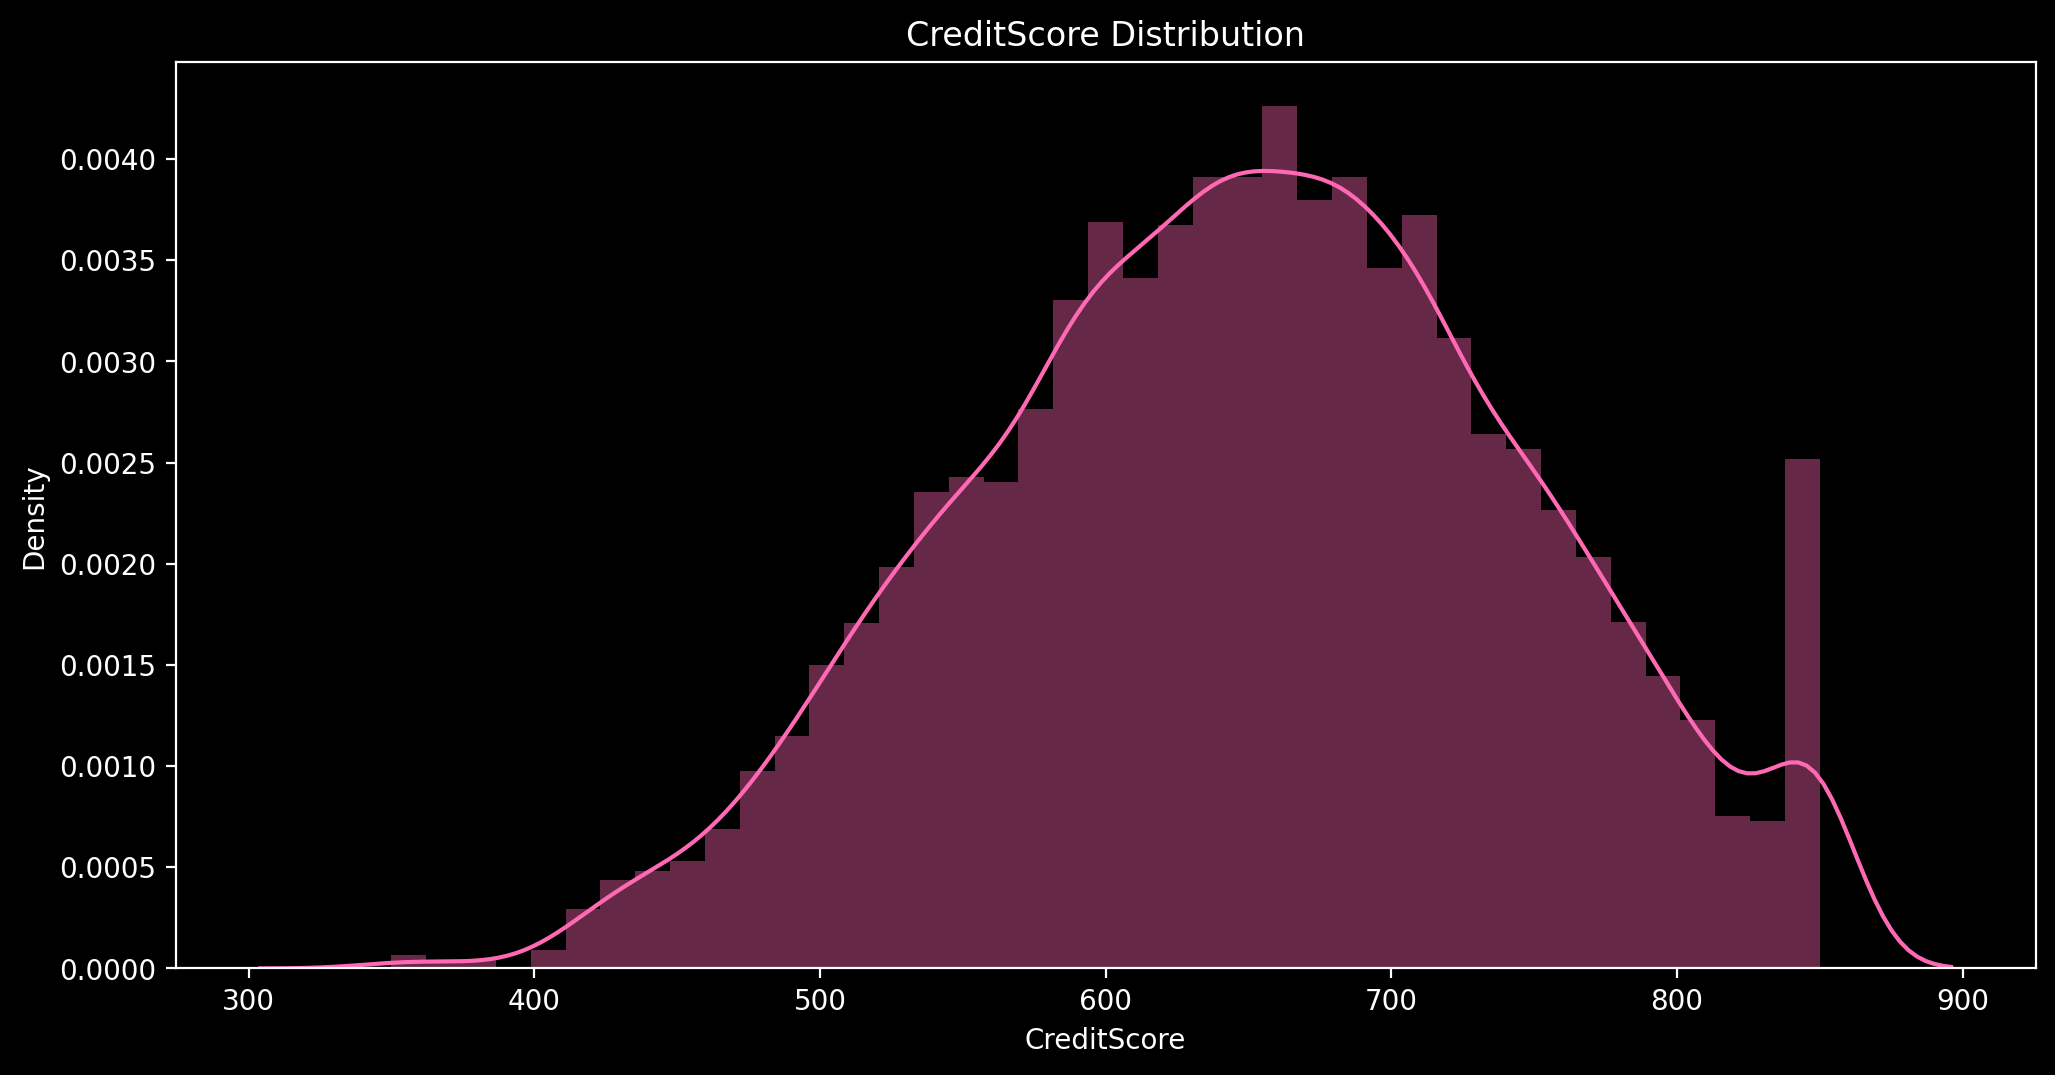

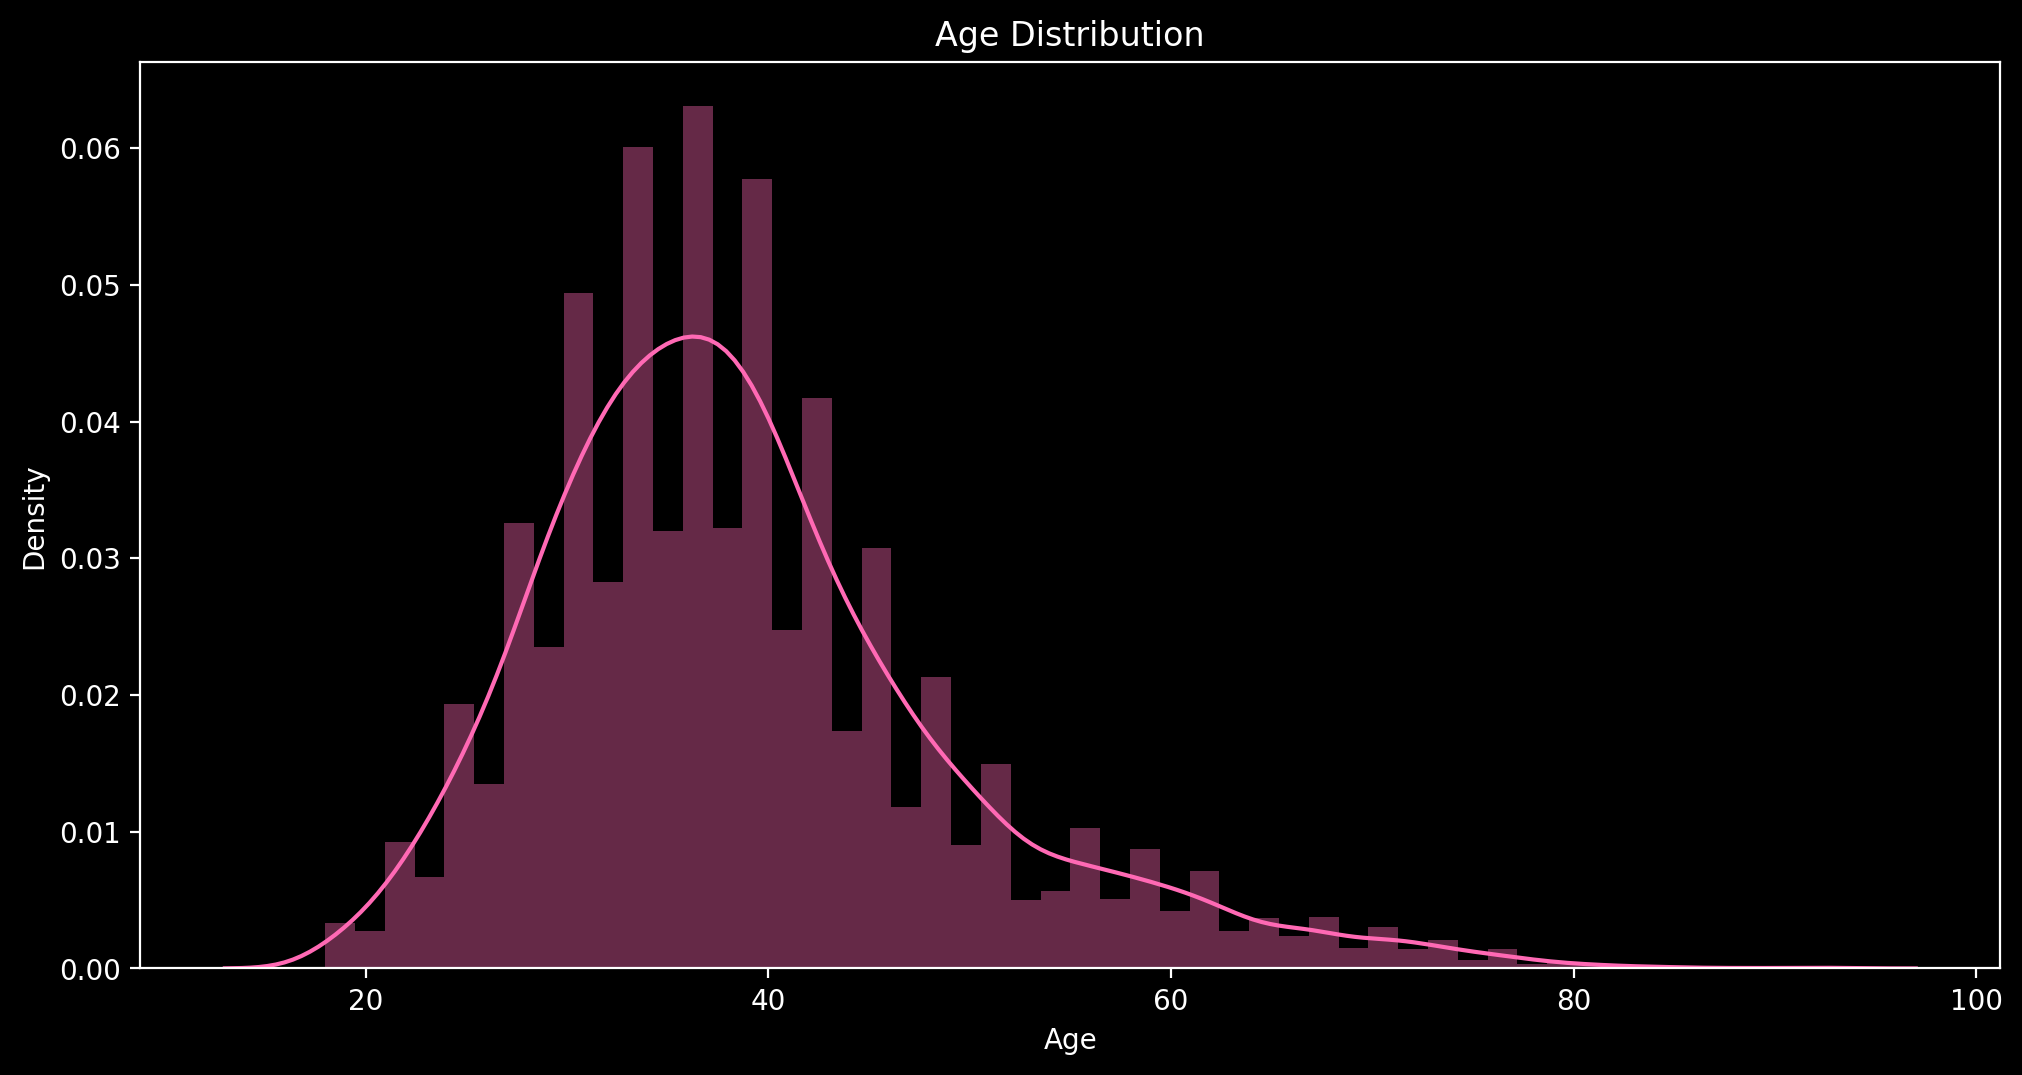

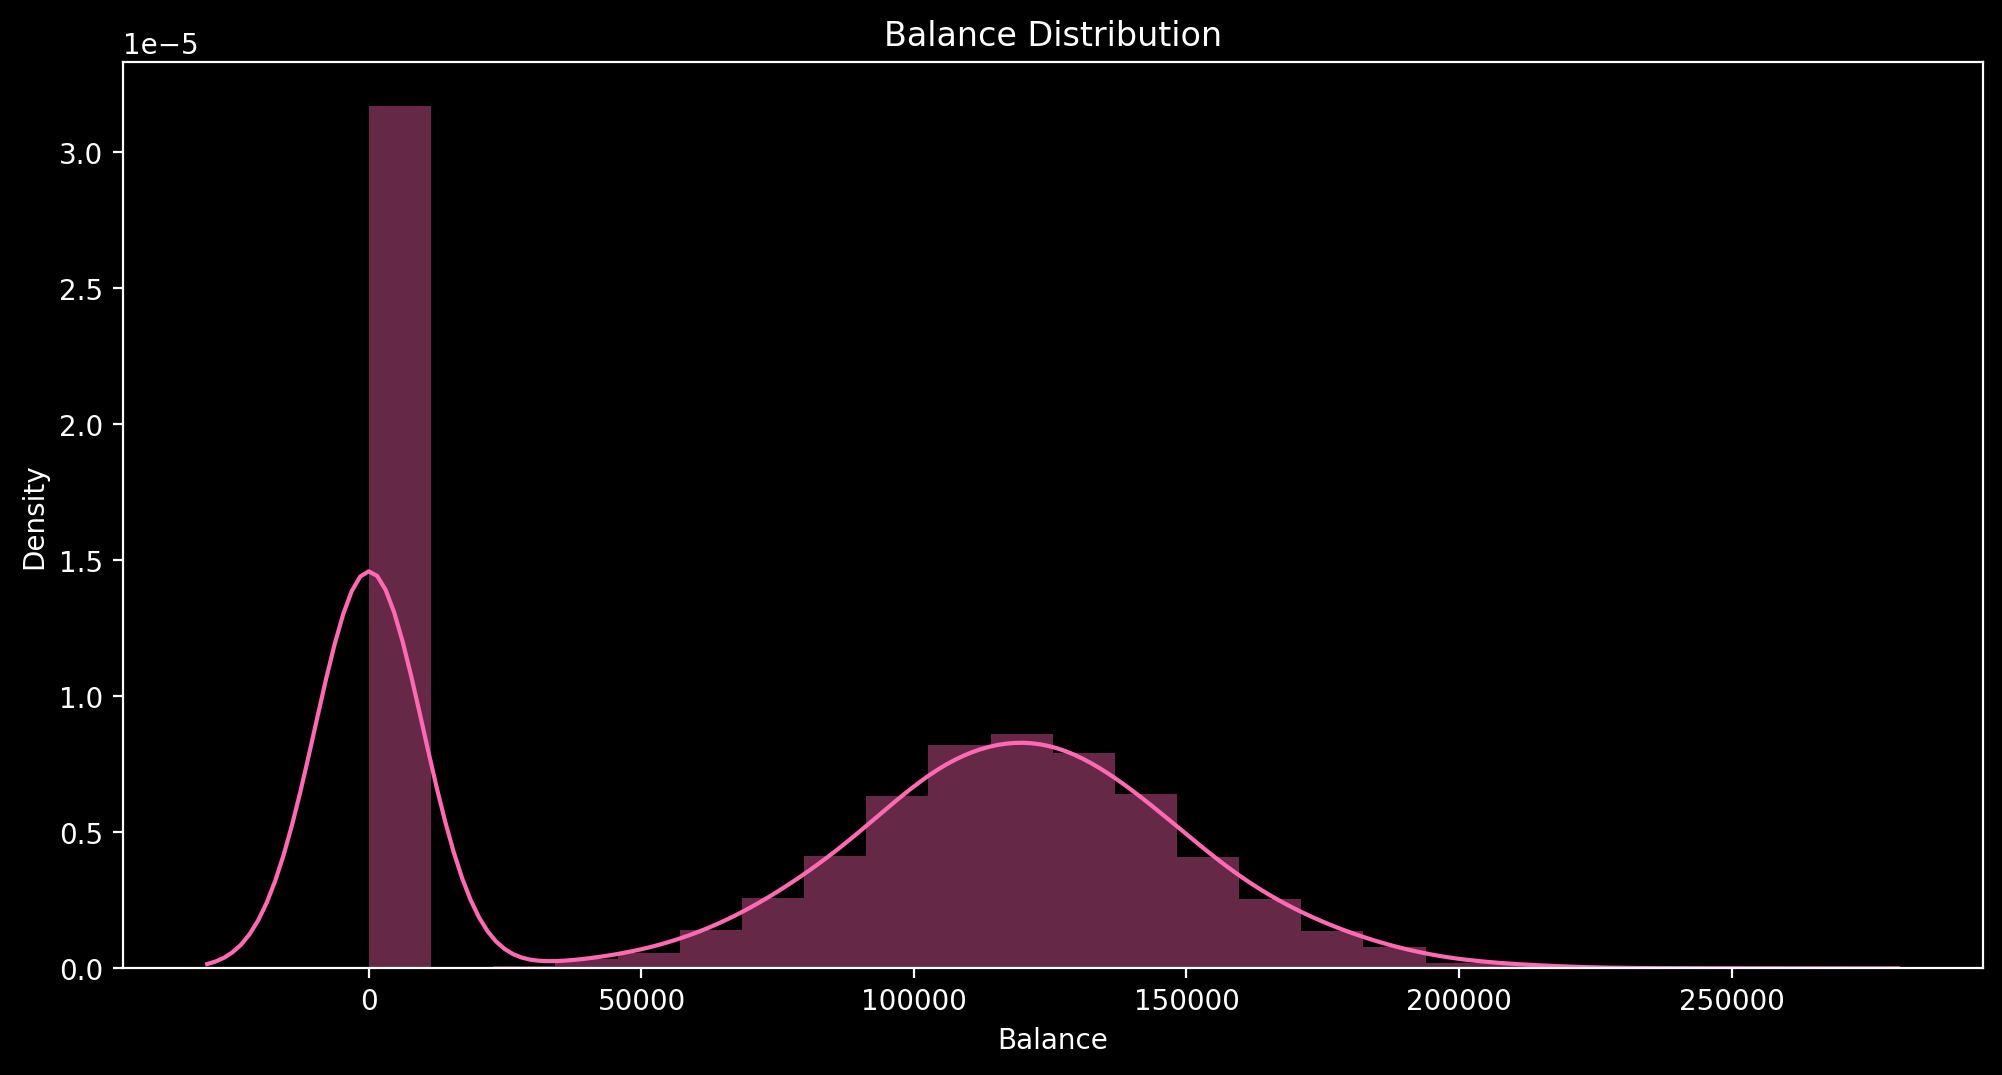

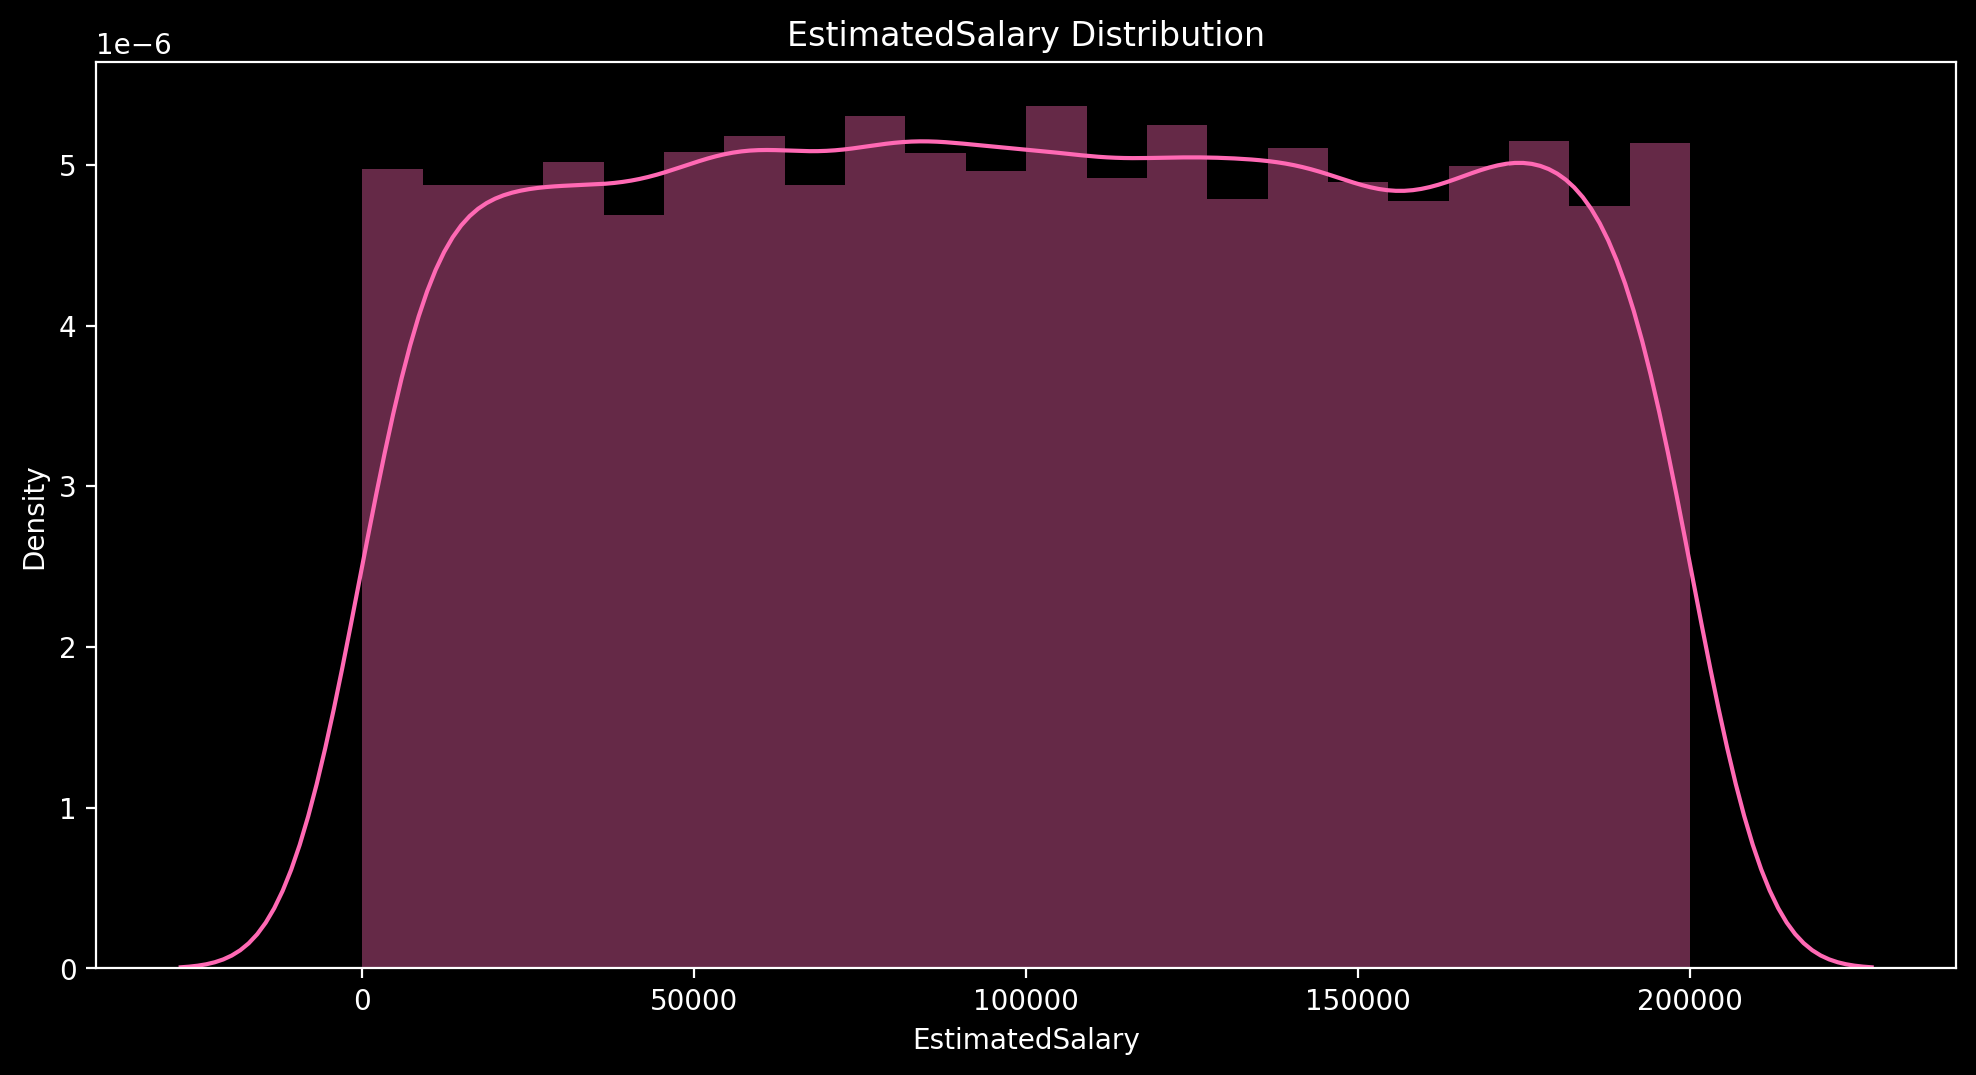

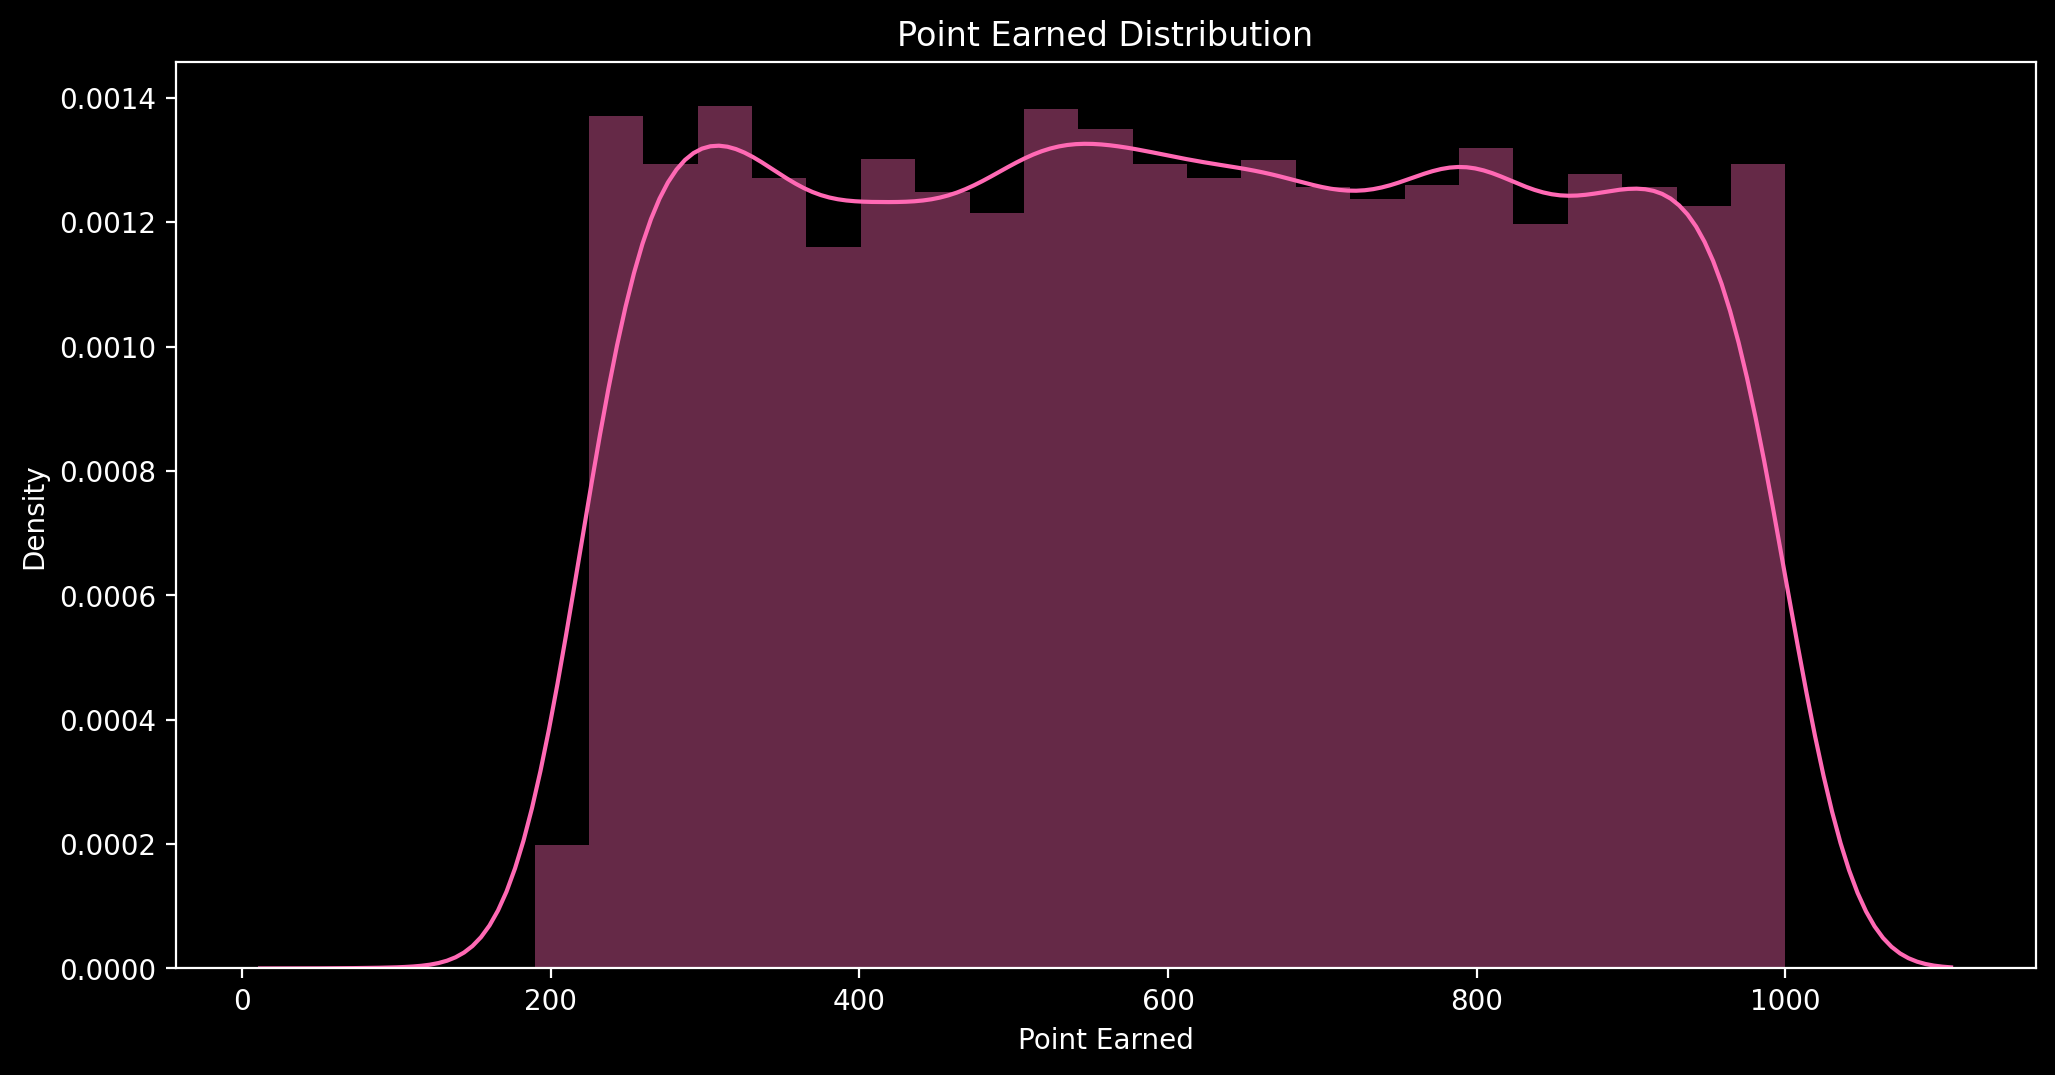

In [29]:
# Distribution Plots
def distplot(x):
    for i in x:
        plt.figure(figsize = (12, 6), dpi = 200)
        sns.distplot(data[i], color = 'hotpink')
        plt.title('{} Distribution'.format(i))
        plt.show()
        
distplot(['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned'])

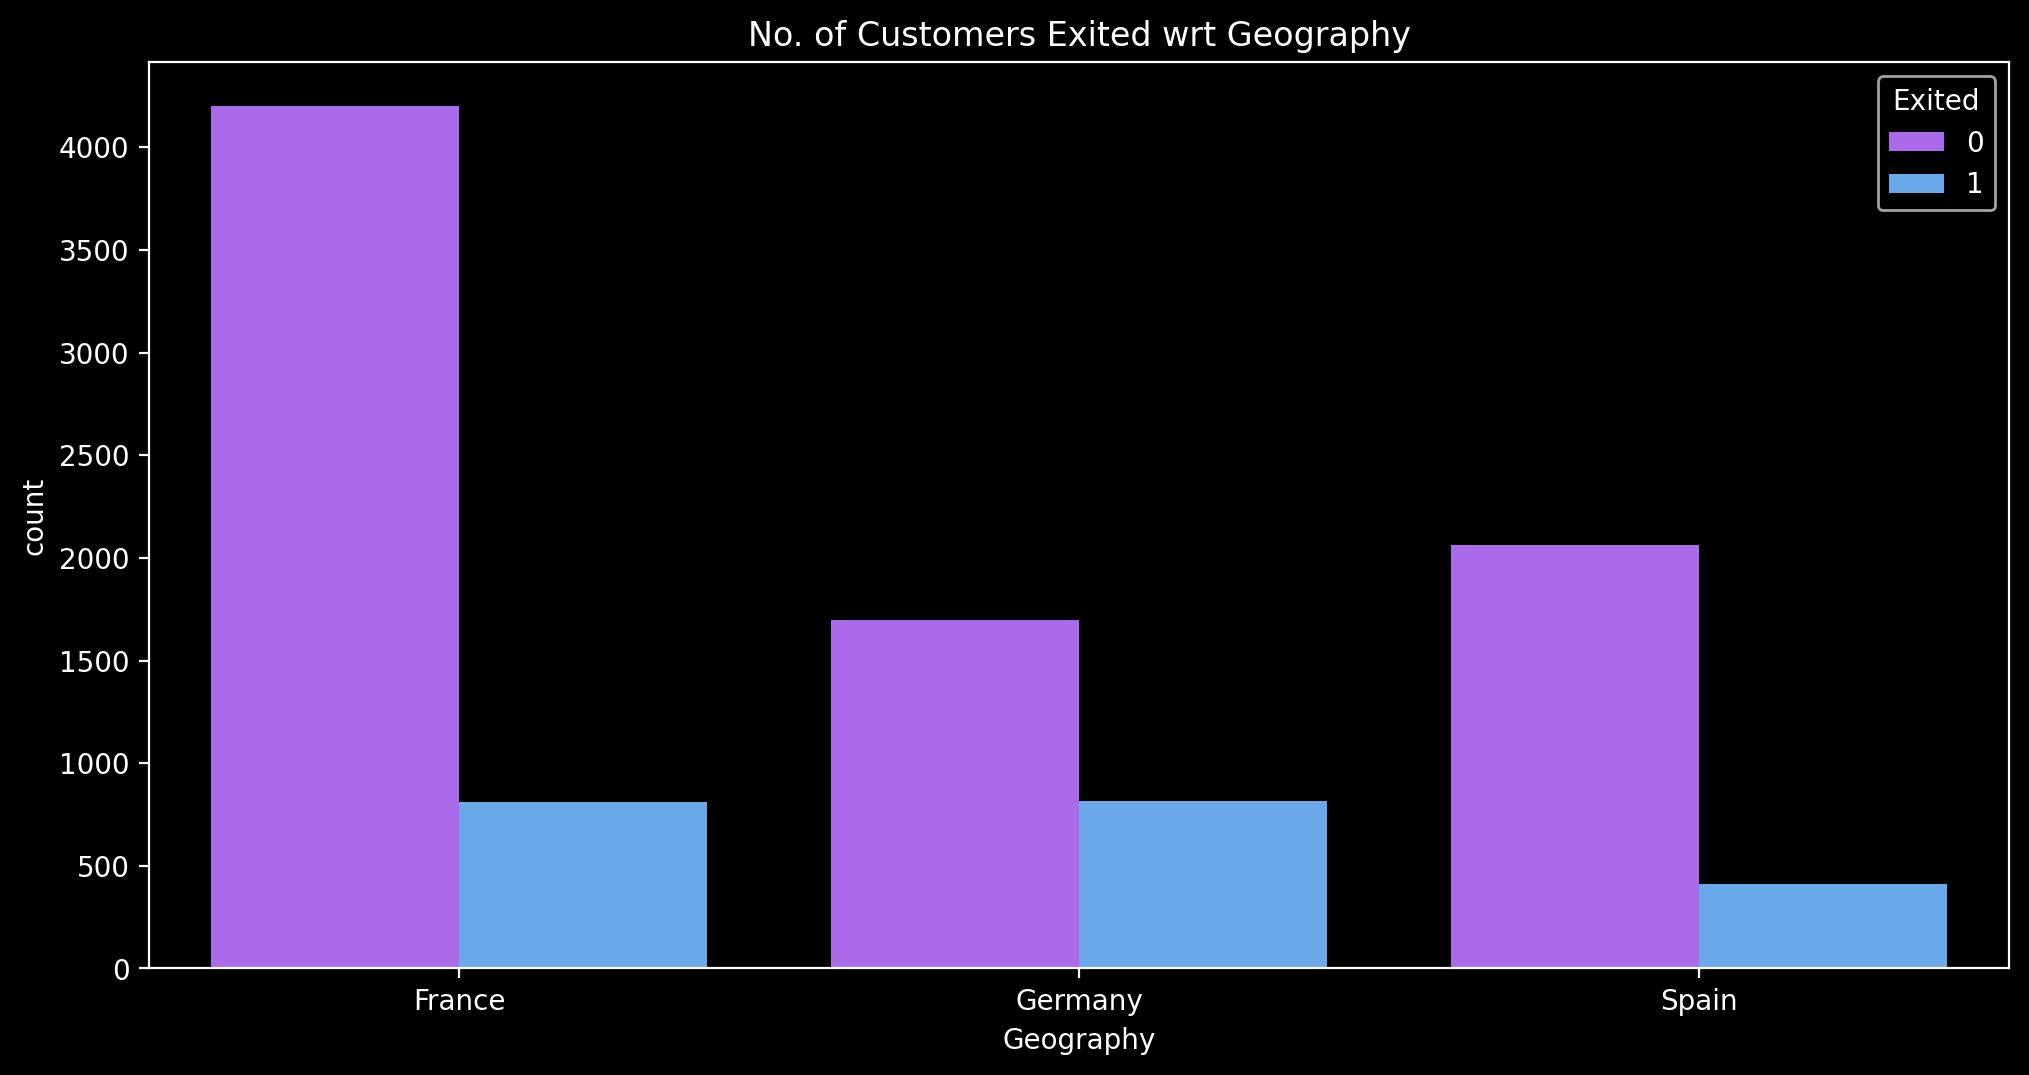

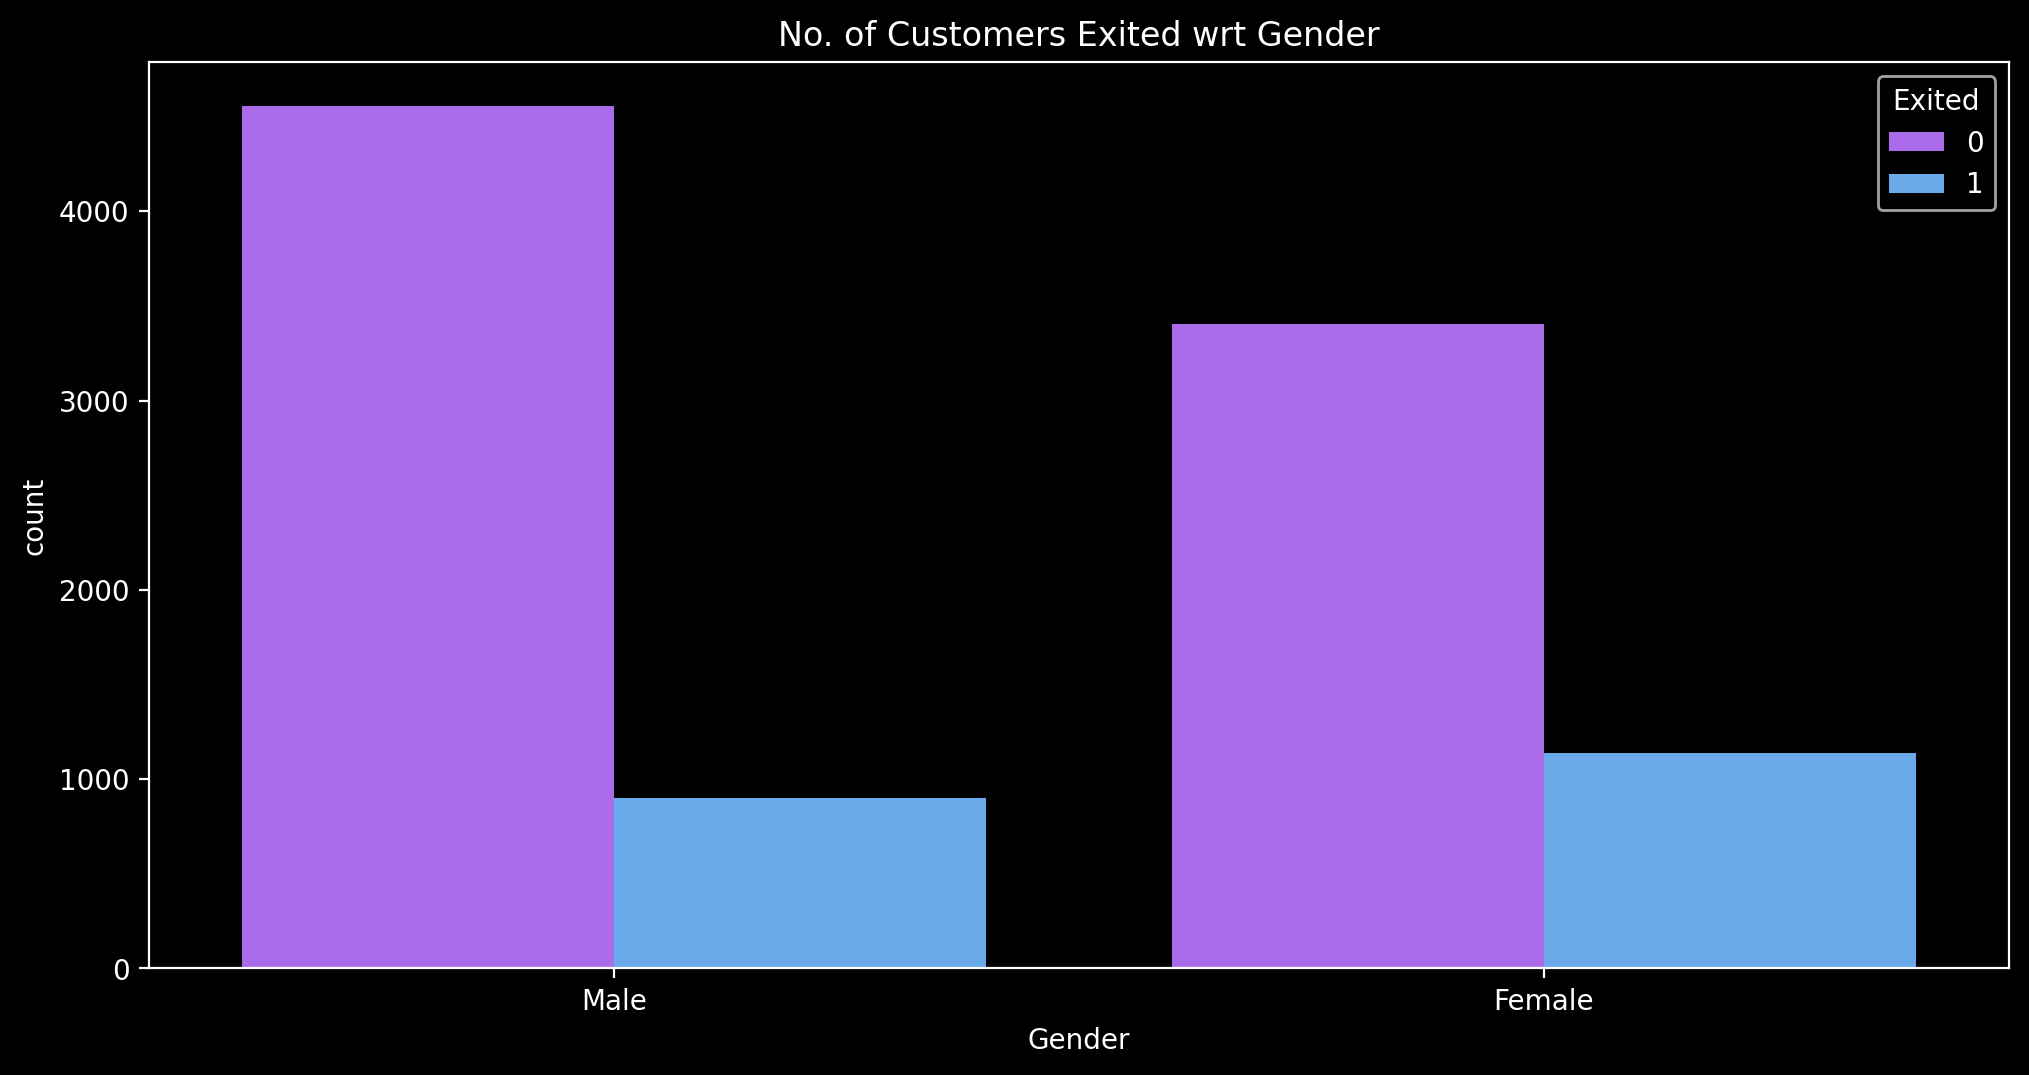

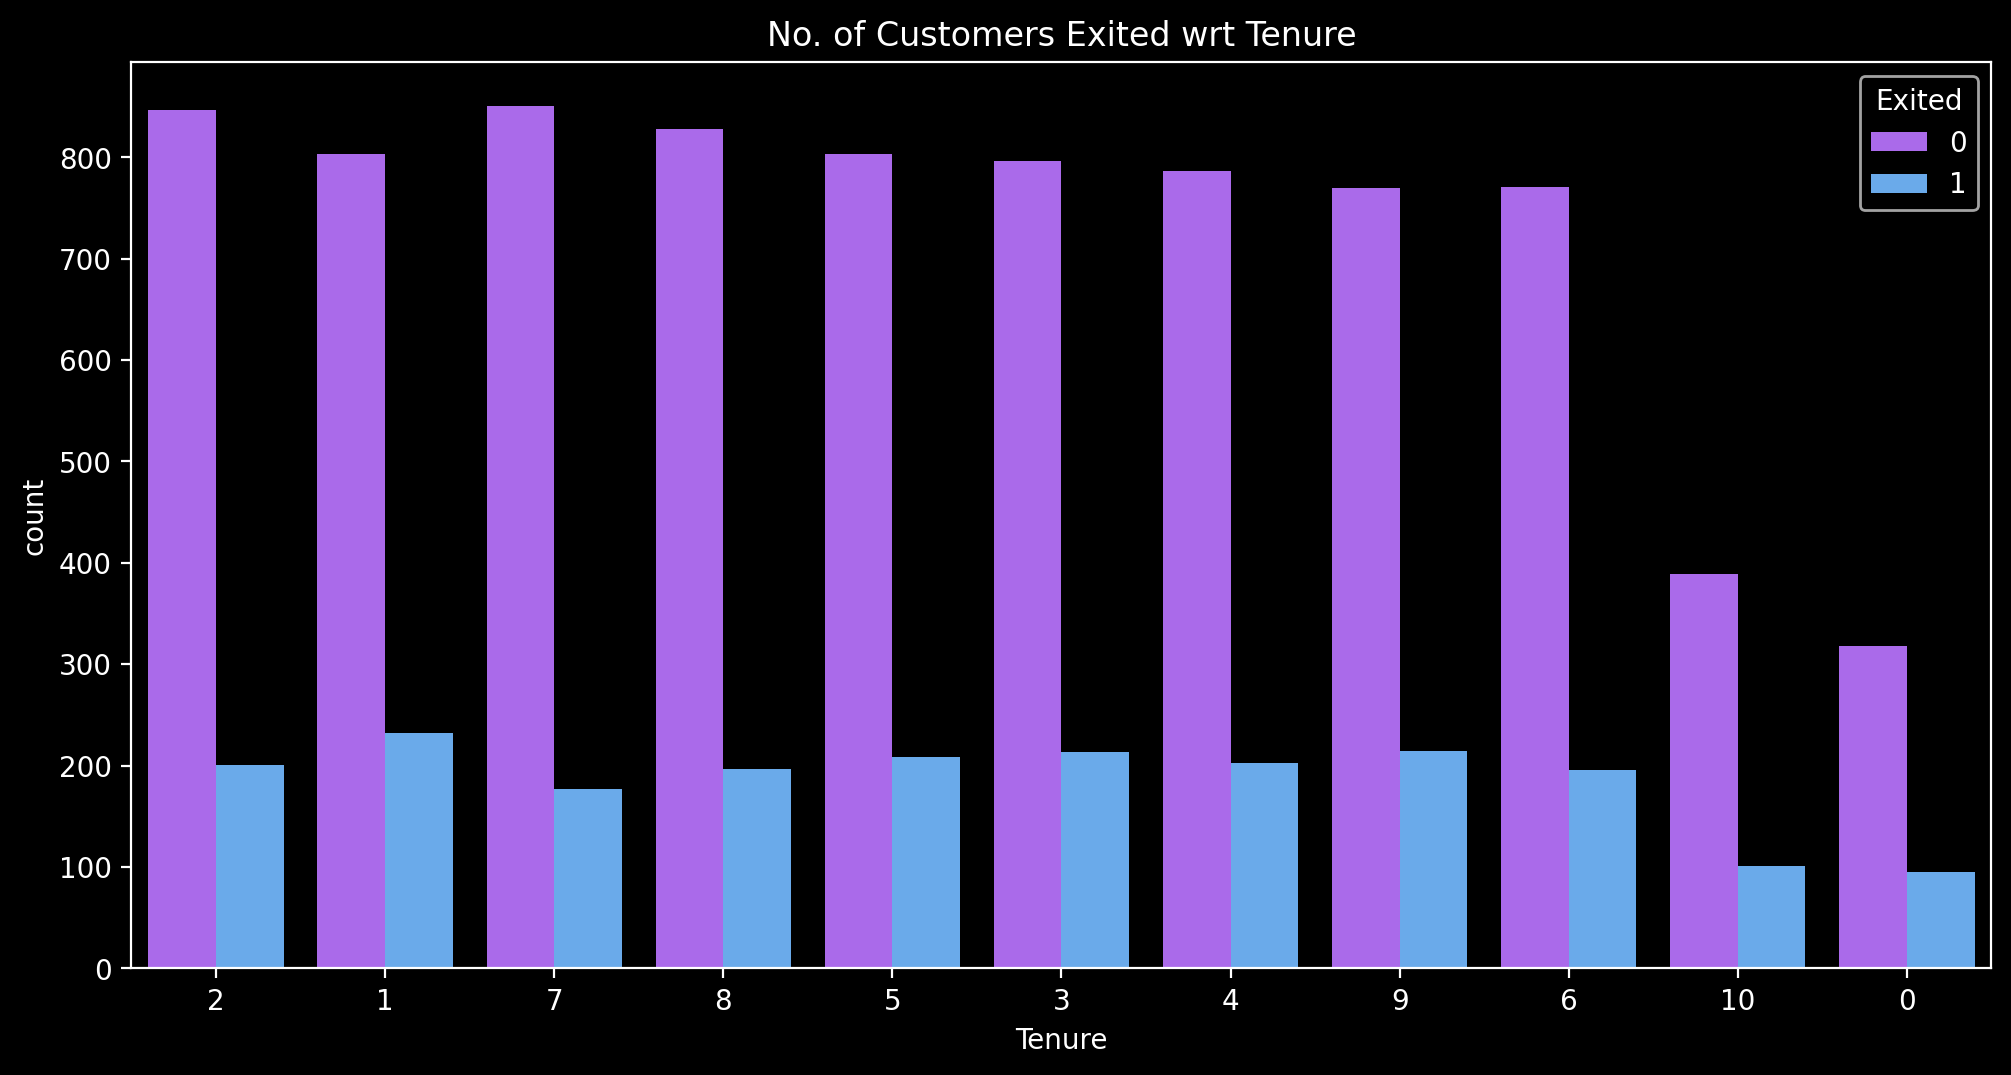

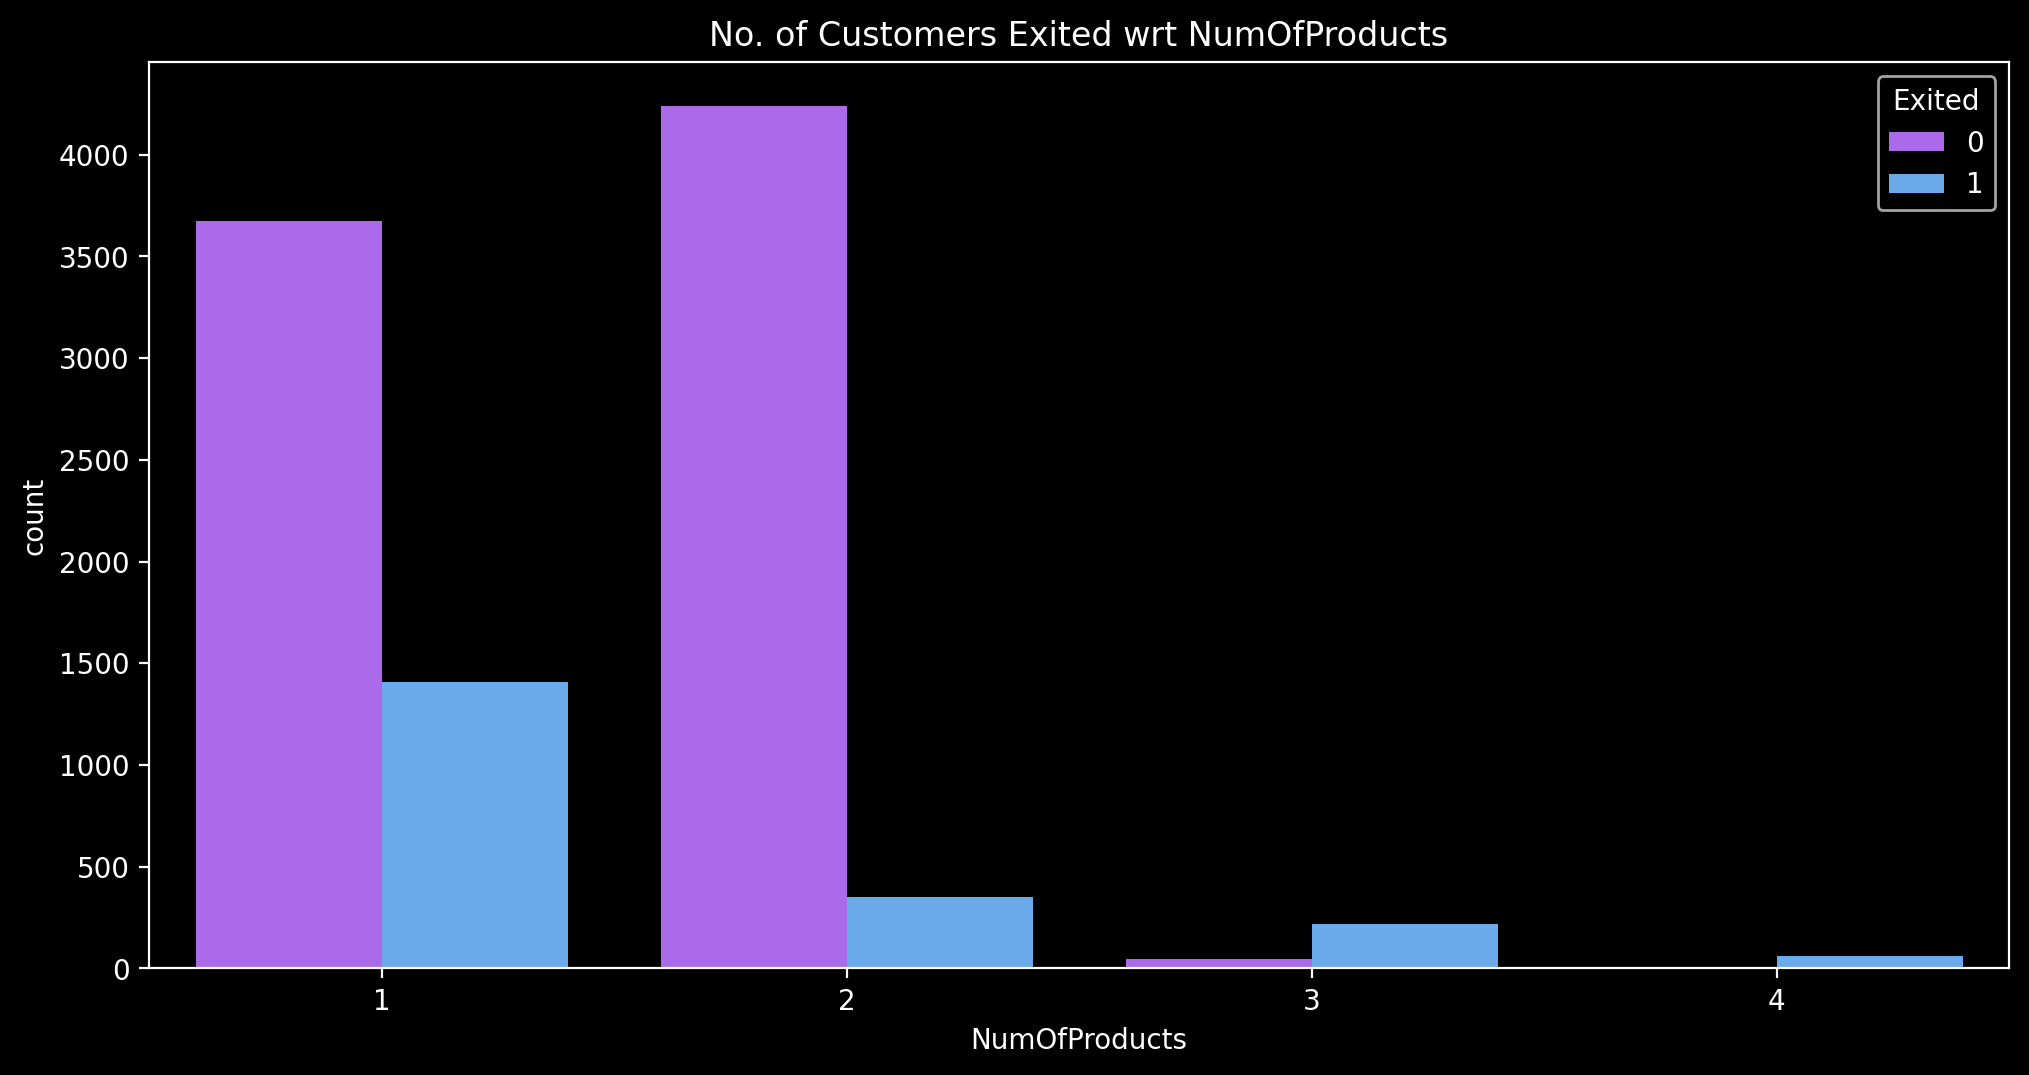

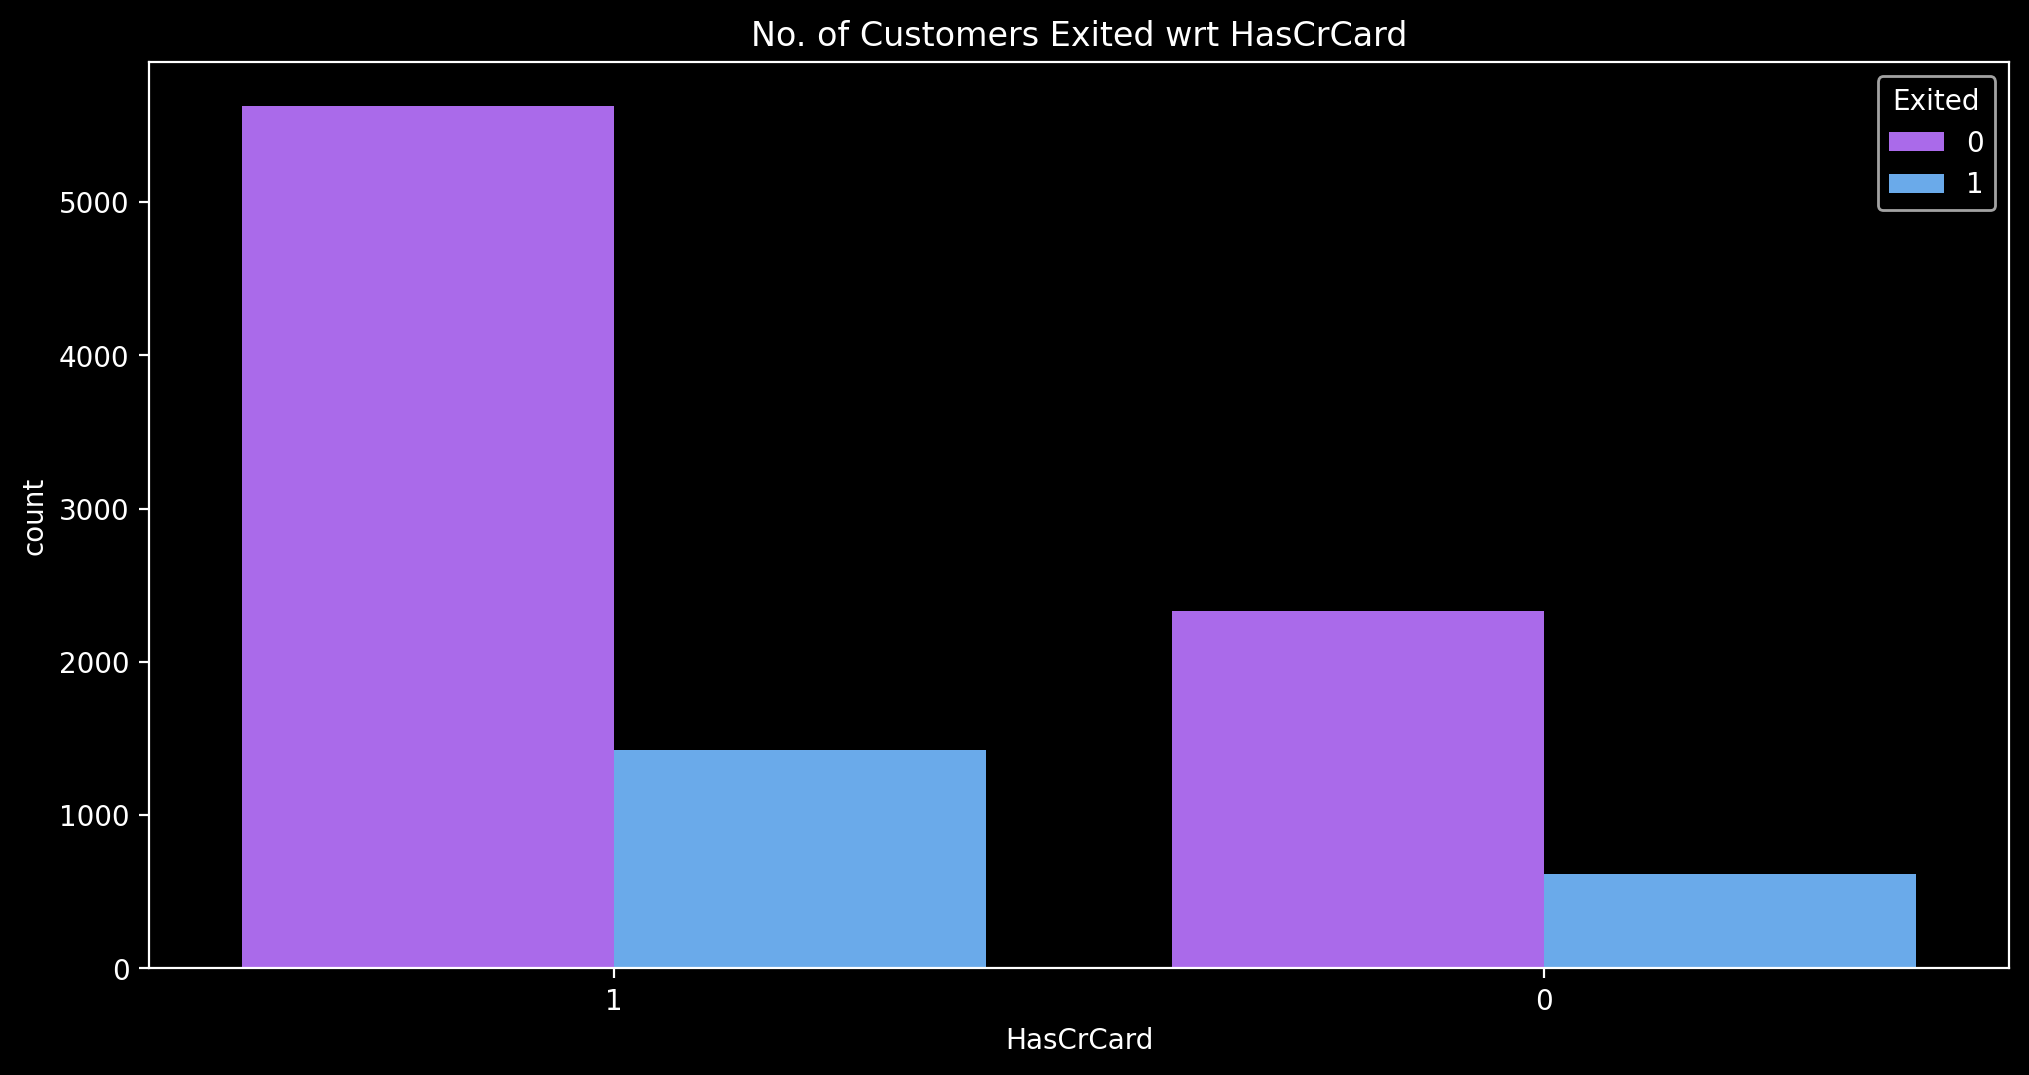

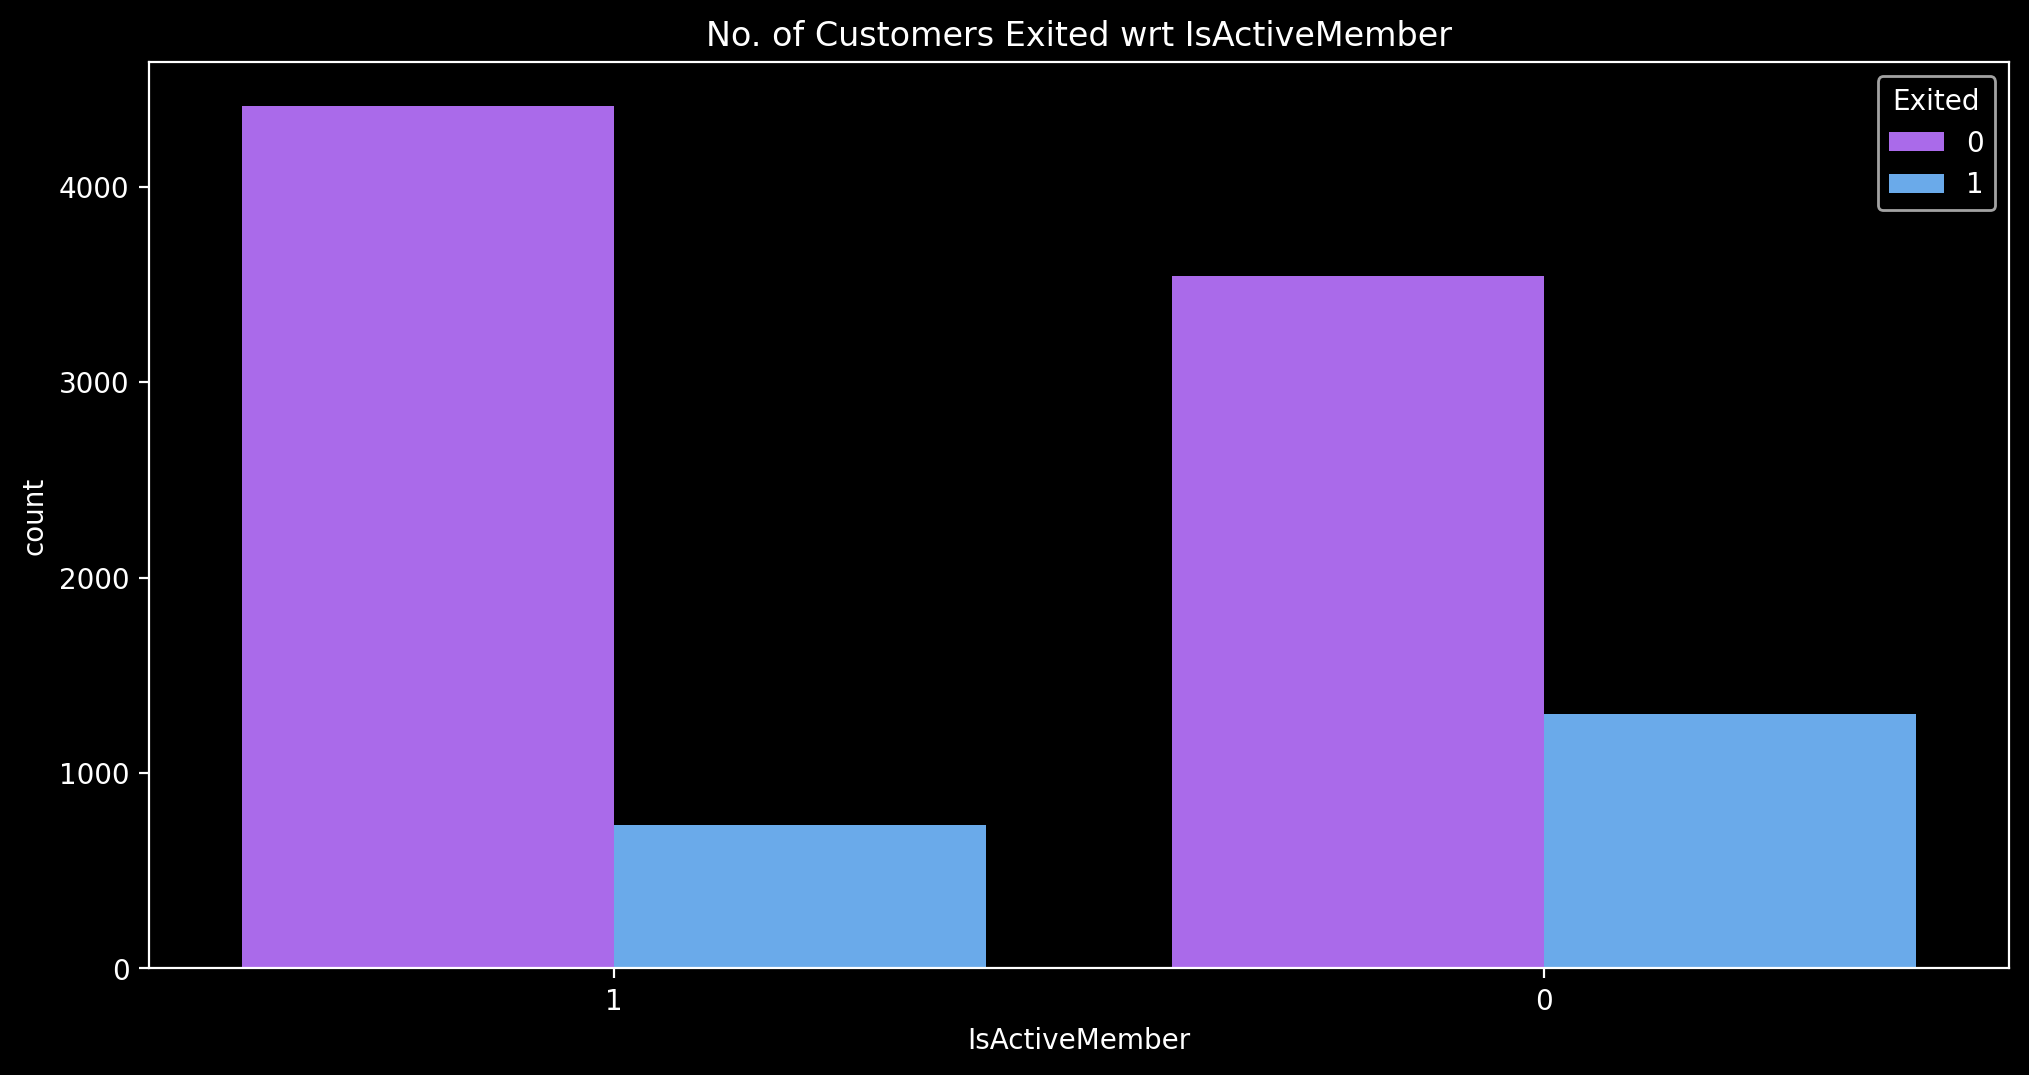

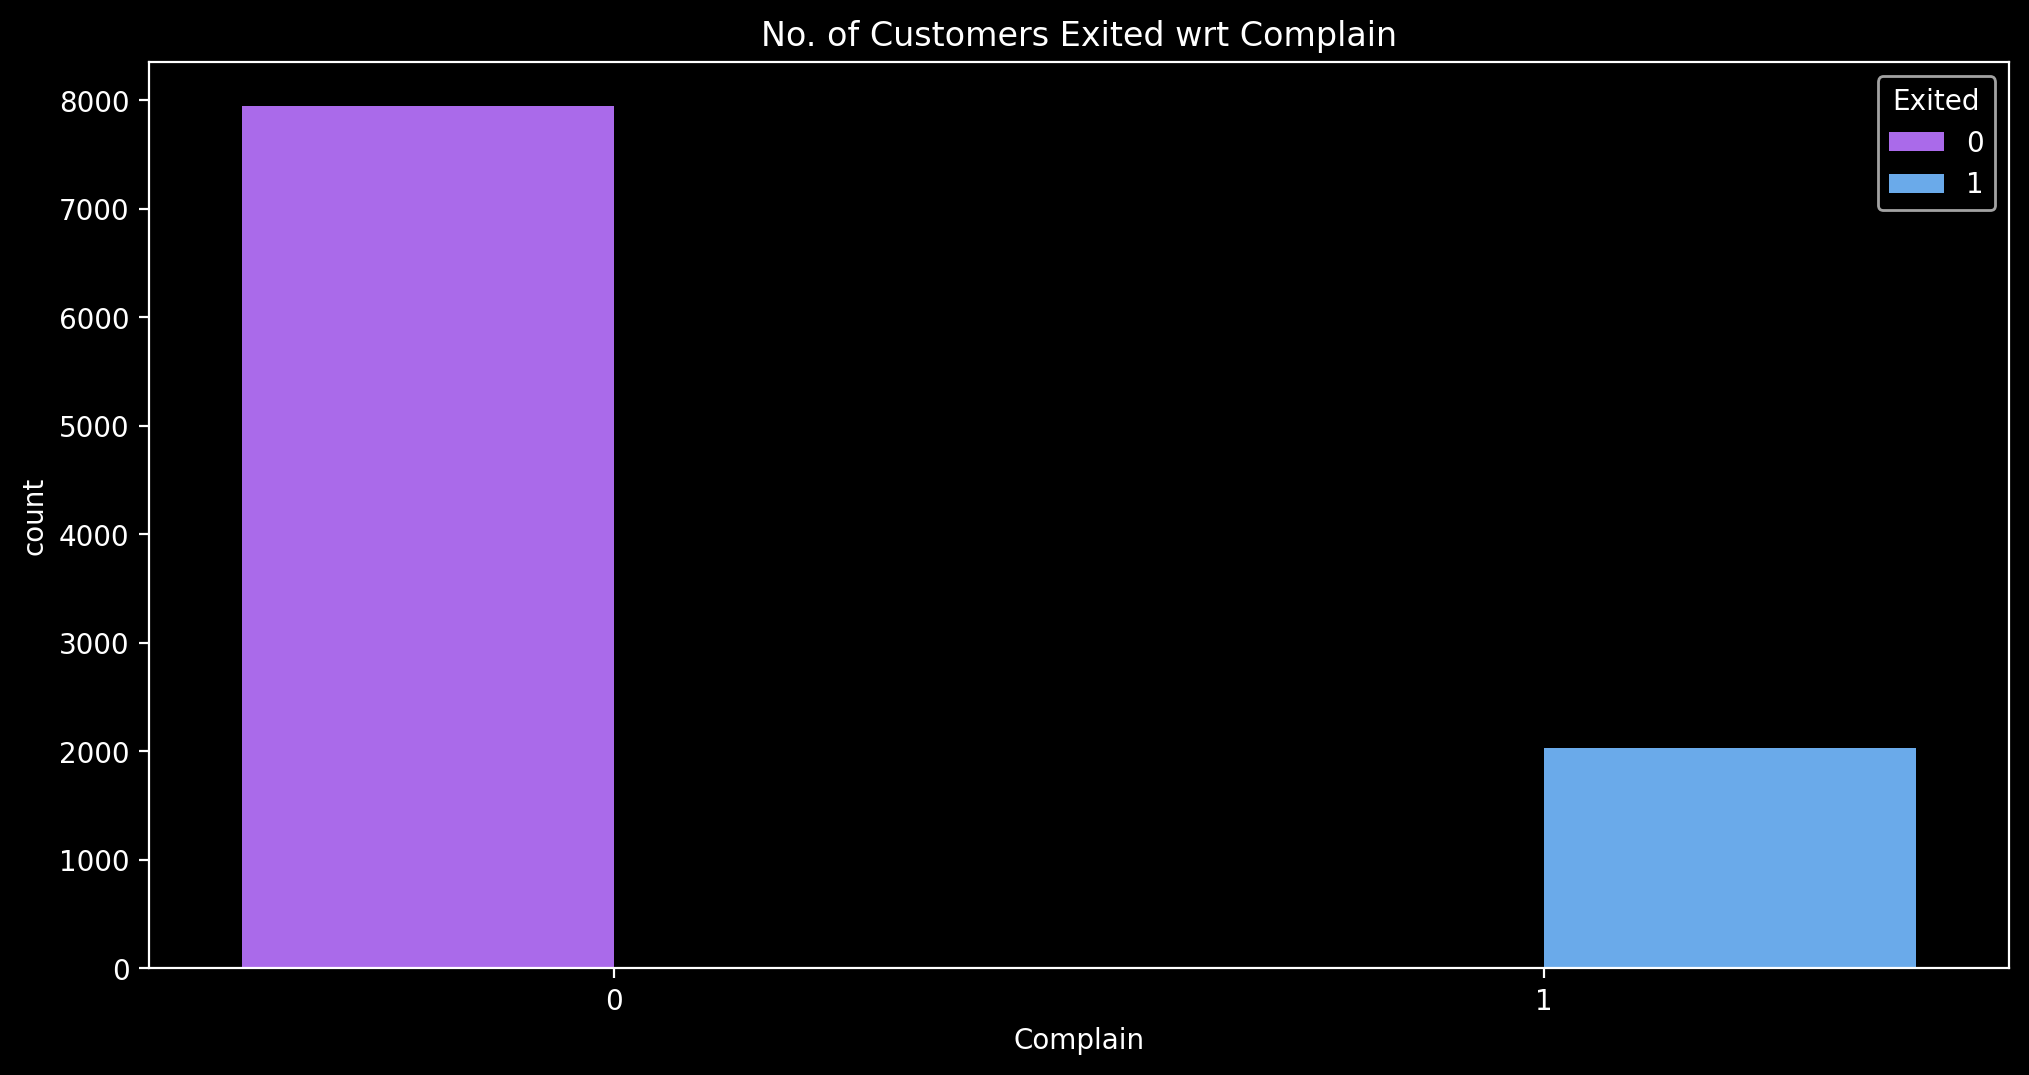

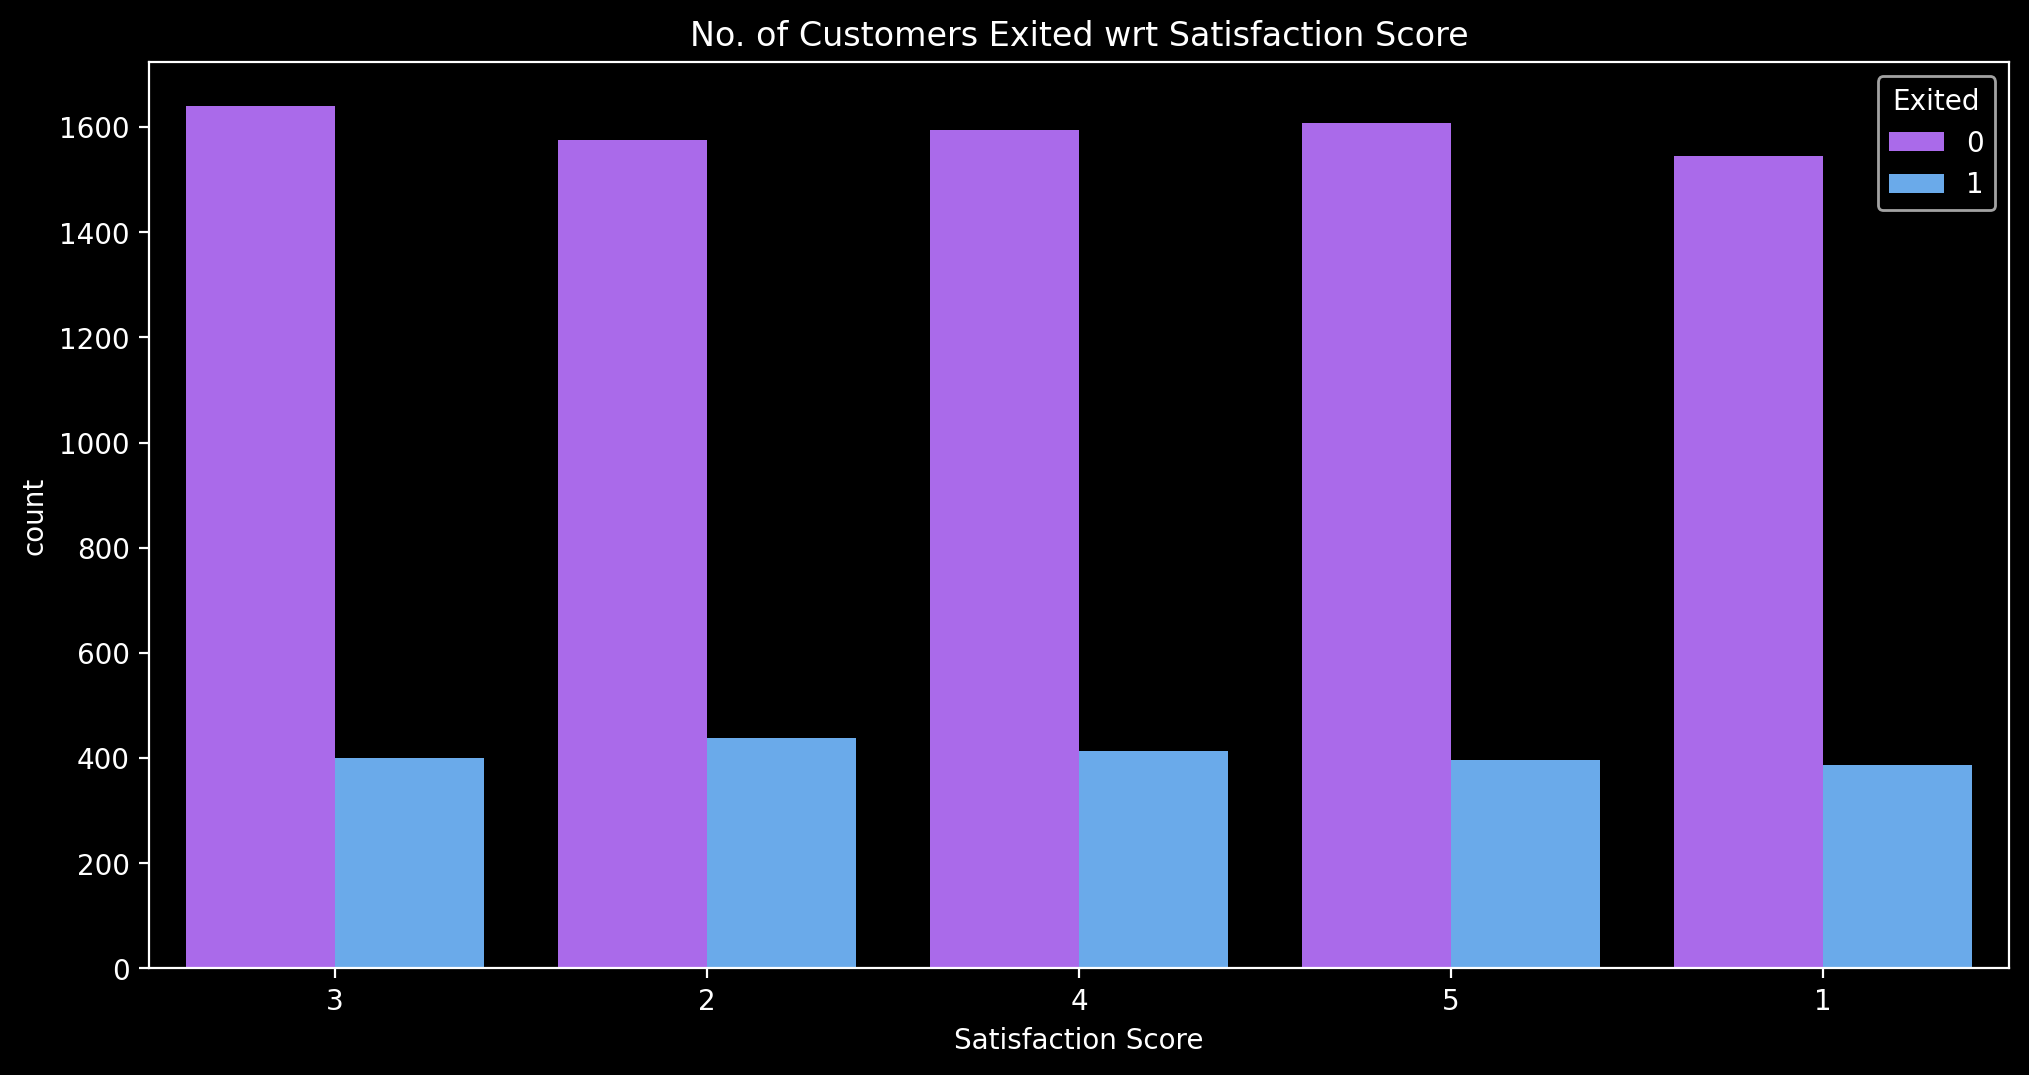

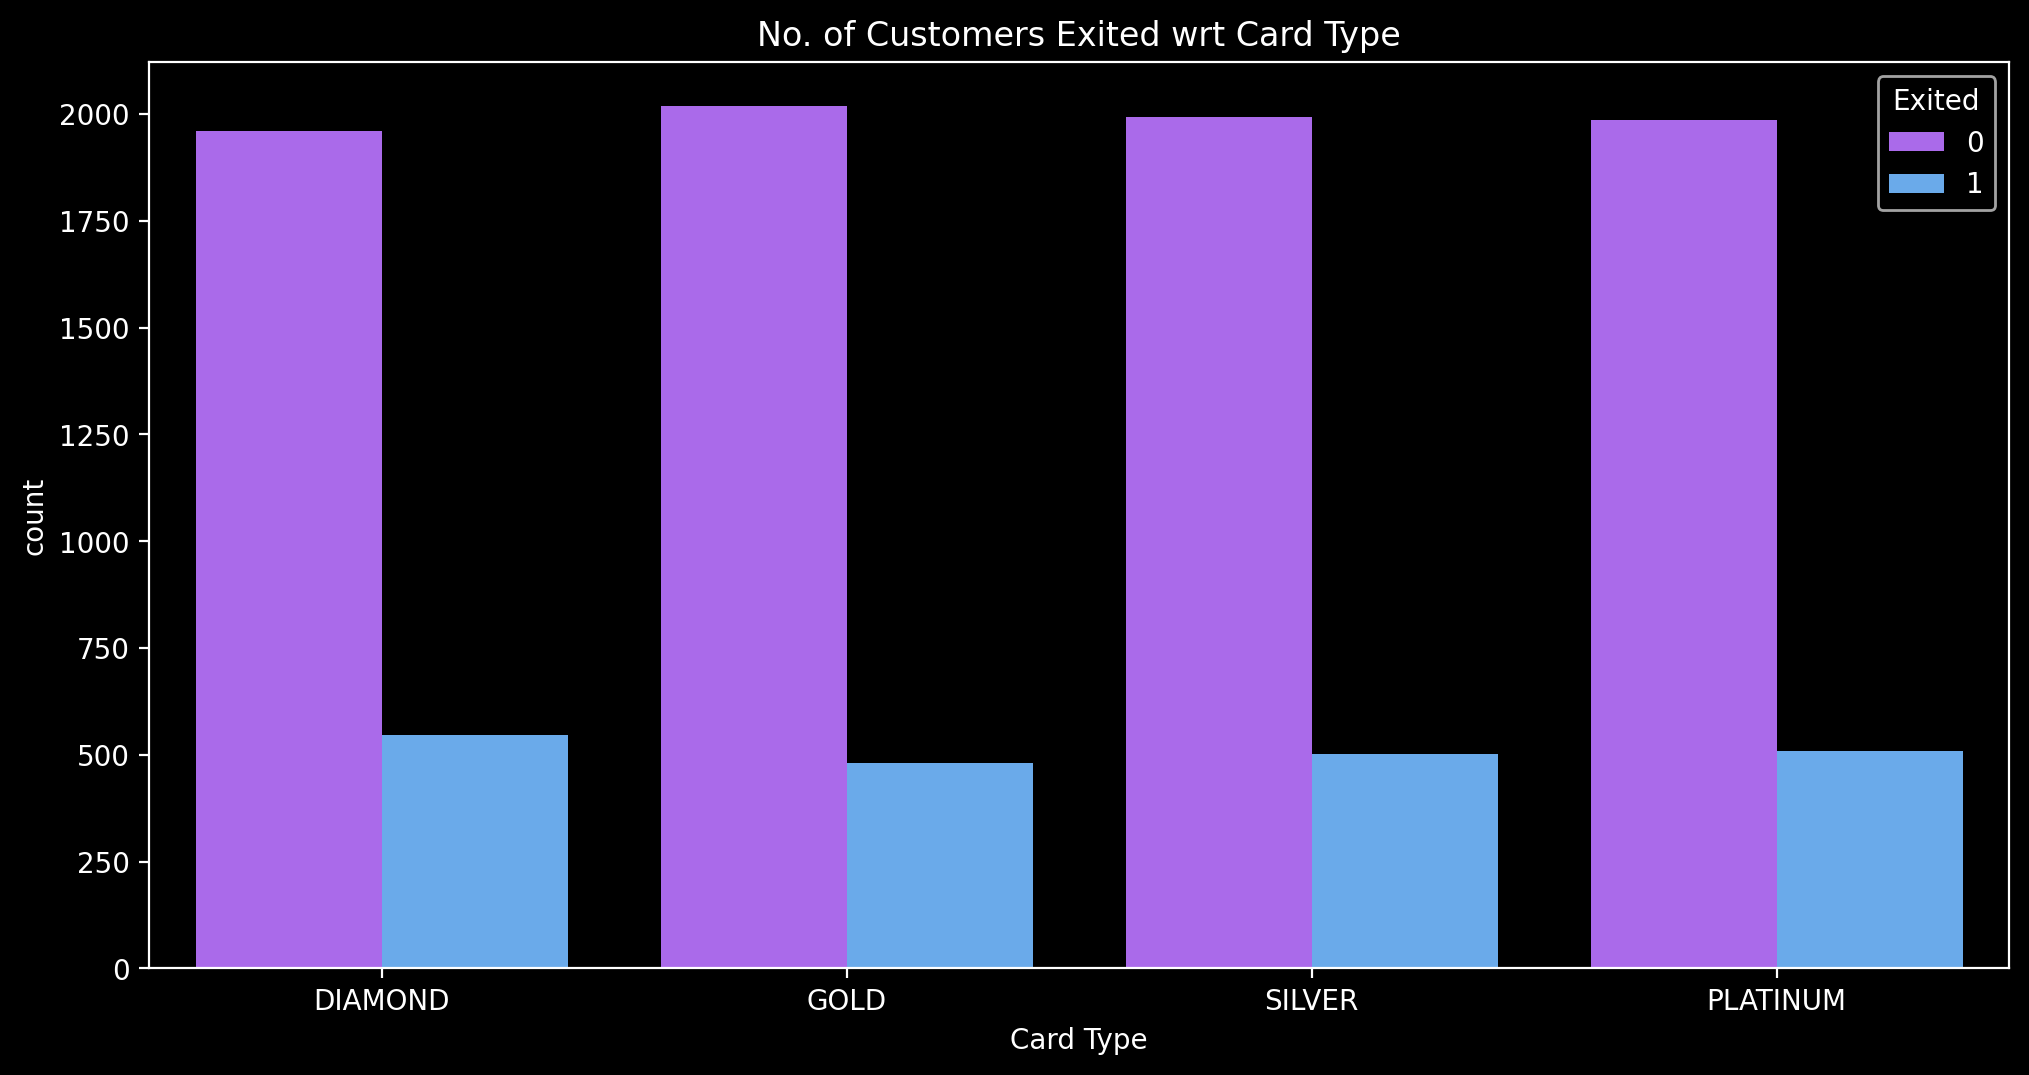

In [30]:
# Countplots for Exited Customers
def countplot_for_exited(x):
    for i in x:
        order = data[i].value_counts().sort_values(ascending = False).index
        plt.figure(figsize = (12, 6), dpi = 200)
        sns.countplot(i, data = data, hue = data['Exited'],order = order, palette = 'cool_r')
        plt.title('No. of Customers Exited wrt {}'.format(i))
        plt.show()
        
countplot_for_exited(['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard',
                      'IsActiveMember', 'Complain', 'Satisfaction Score', 'Card Type'])

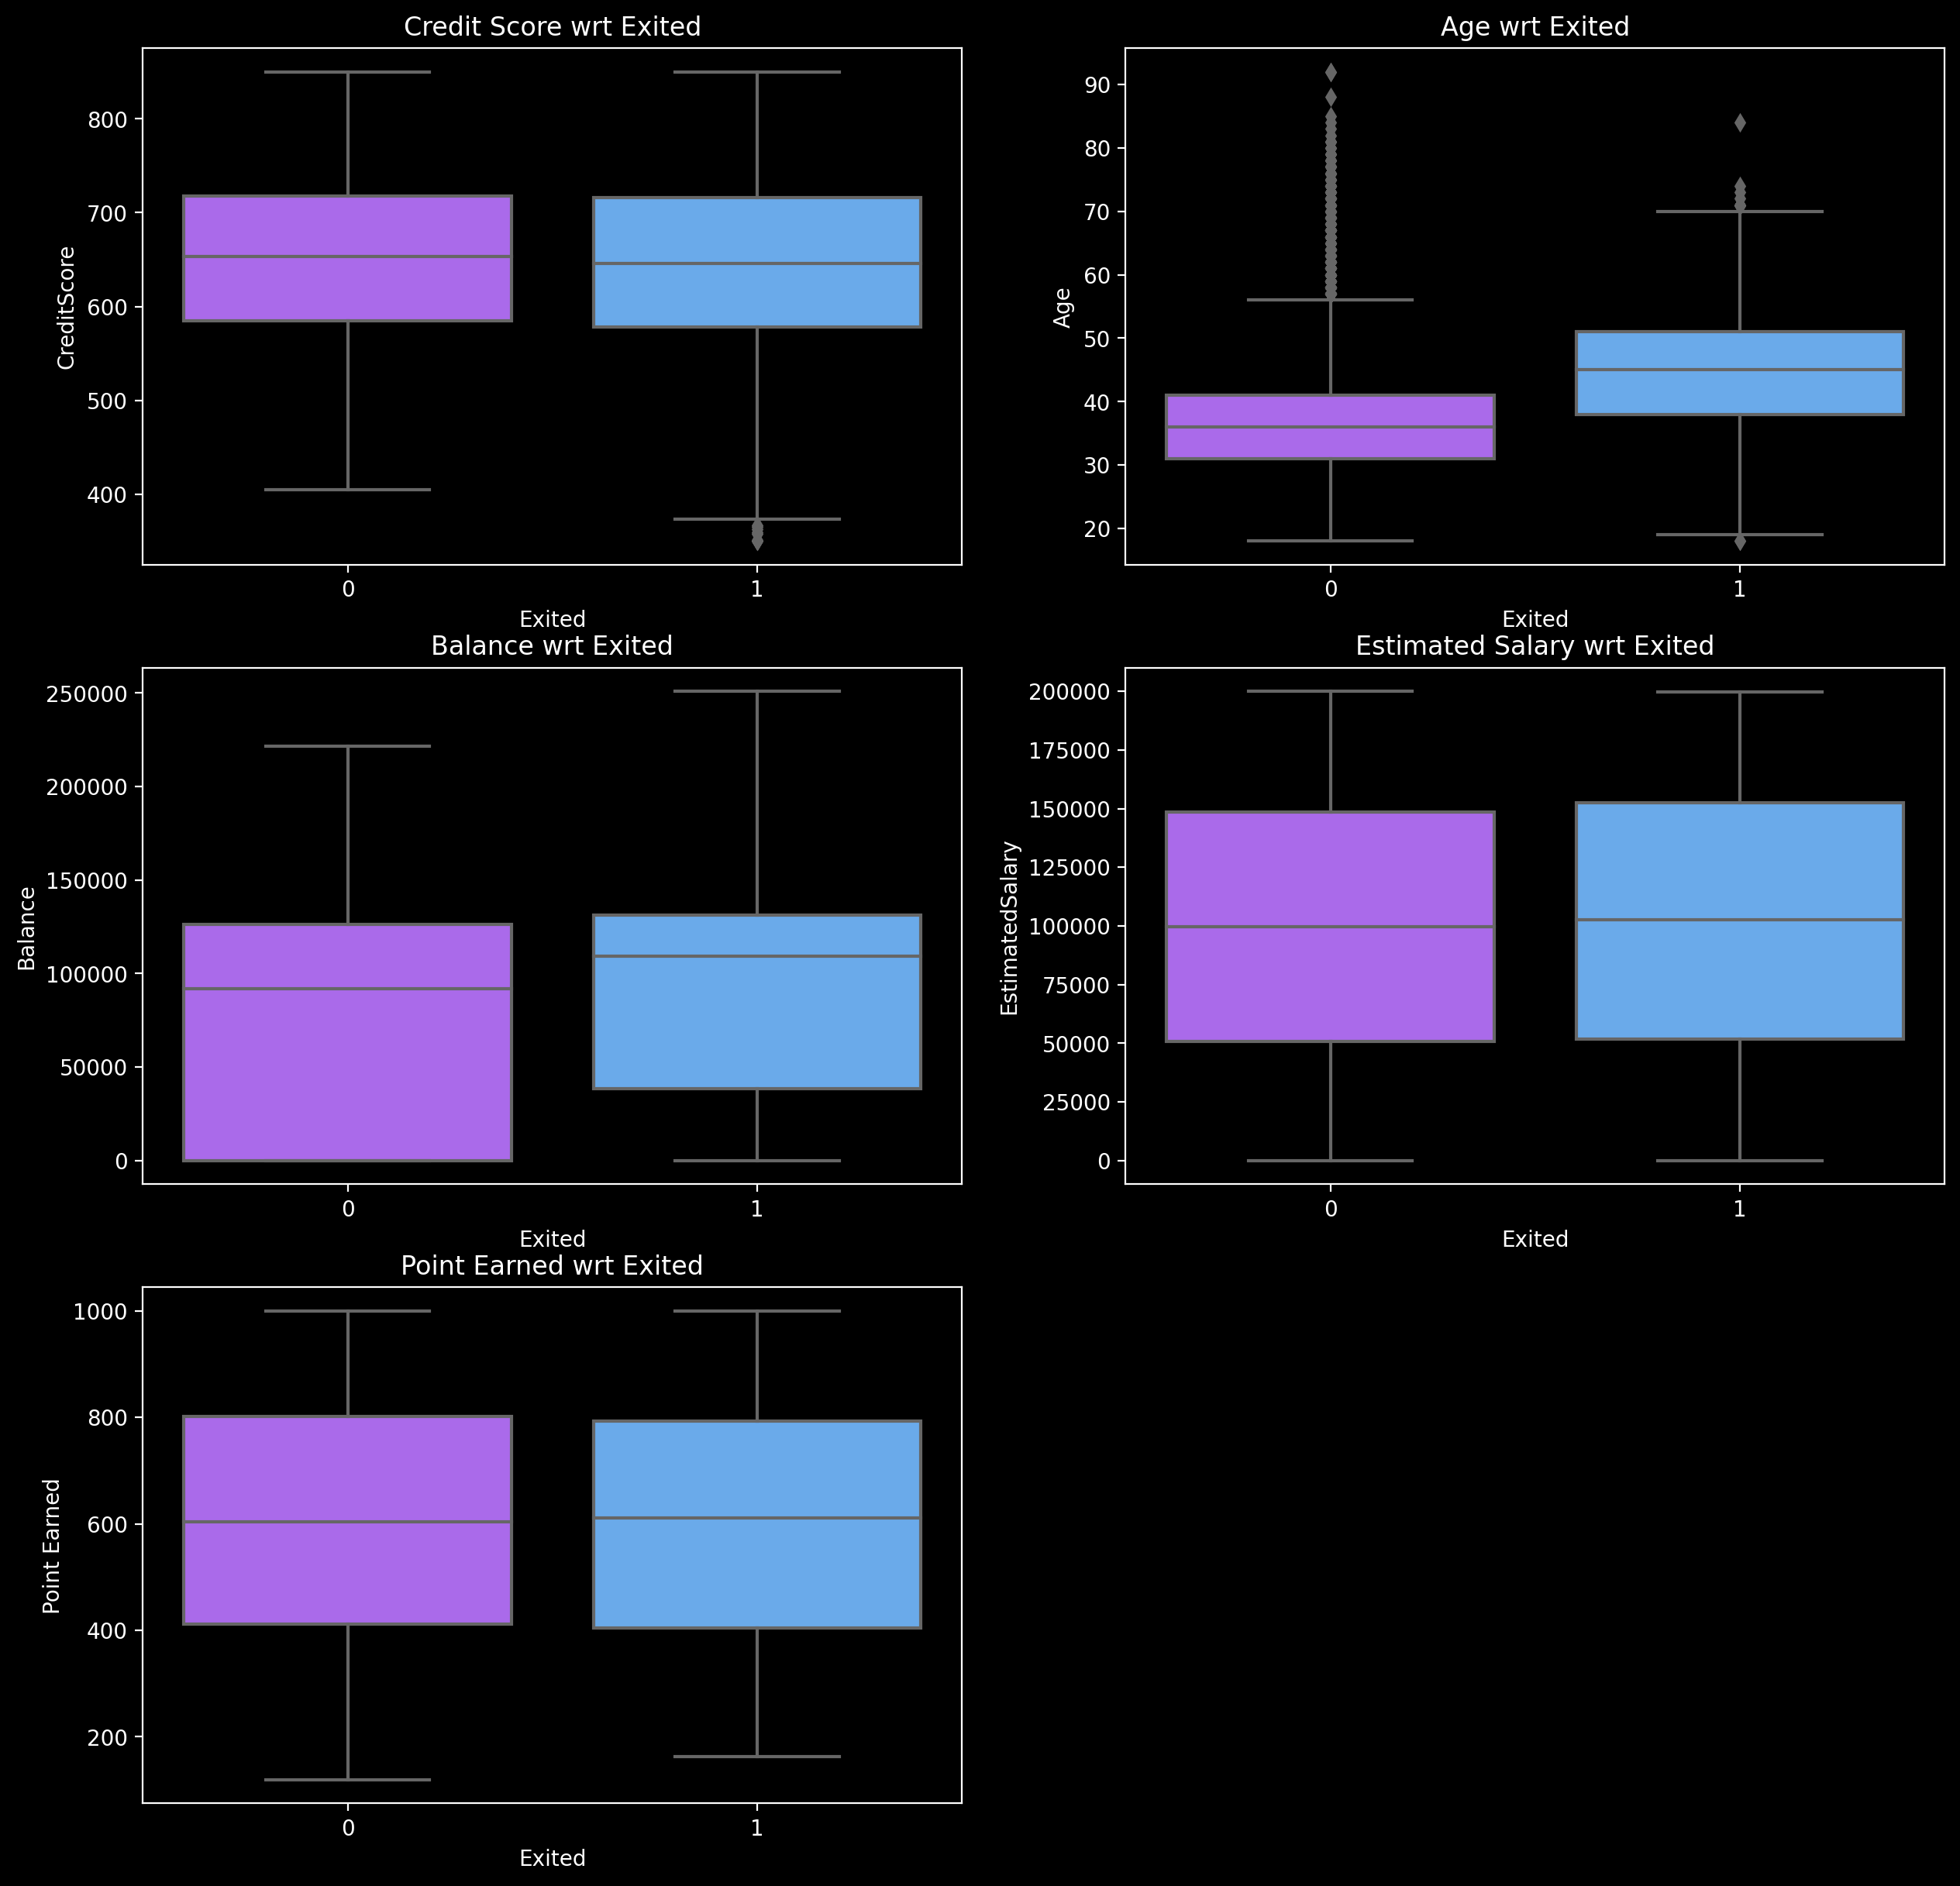

In [40]:
# Boxplots for Exited Customers
plt.figure(figsize = (15,15), dpi = 200)
plt.subplot(3,2,1)
sns.boxplot('Exited', 'CreditScore',  data = data, palette = 'cool_r')
plt.title('Credit Score wrt Exited')

plt.subplot(3,2,2)
sns.boxplot('Exited', 'Age',  data = data, palette = 'cool_r')
plt.title('Age wrt Exited')

plt.subplot(3,2,3)
sns.boxplot('Exited', 'Balance',  data = data, palette = 'cool_r')
plt.title('Balance wrt Exited')

plt.subplot(3,2,4)
sns.boxplot('Exited', 'EstimatedSalary',  data = data, palette = 'cool_r')
plt.title('Estimated Salary wrt Exited')

plt.subplot(3,2,5)
sns.boxplot('Exited', 'Point Earned',  data = data, palette = 'cool_r')
plt.title('Point Earned wrt Exited')

plt.show()

<AxesSubplot:xlabel='Balance', ylabel='CreditScore'>

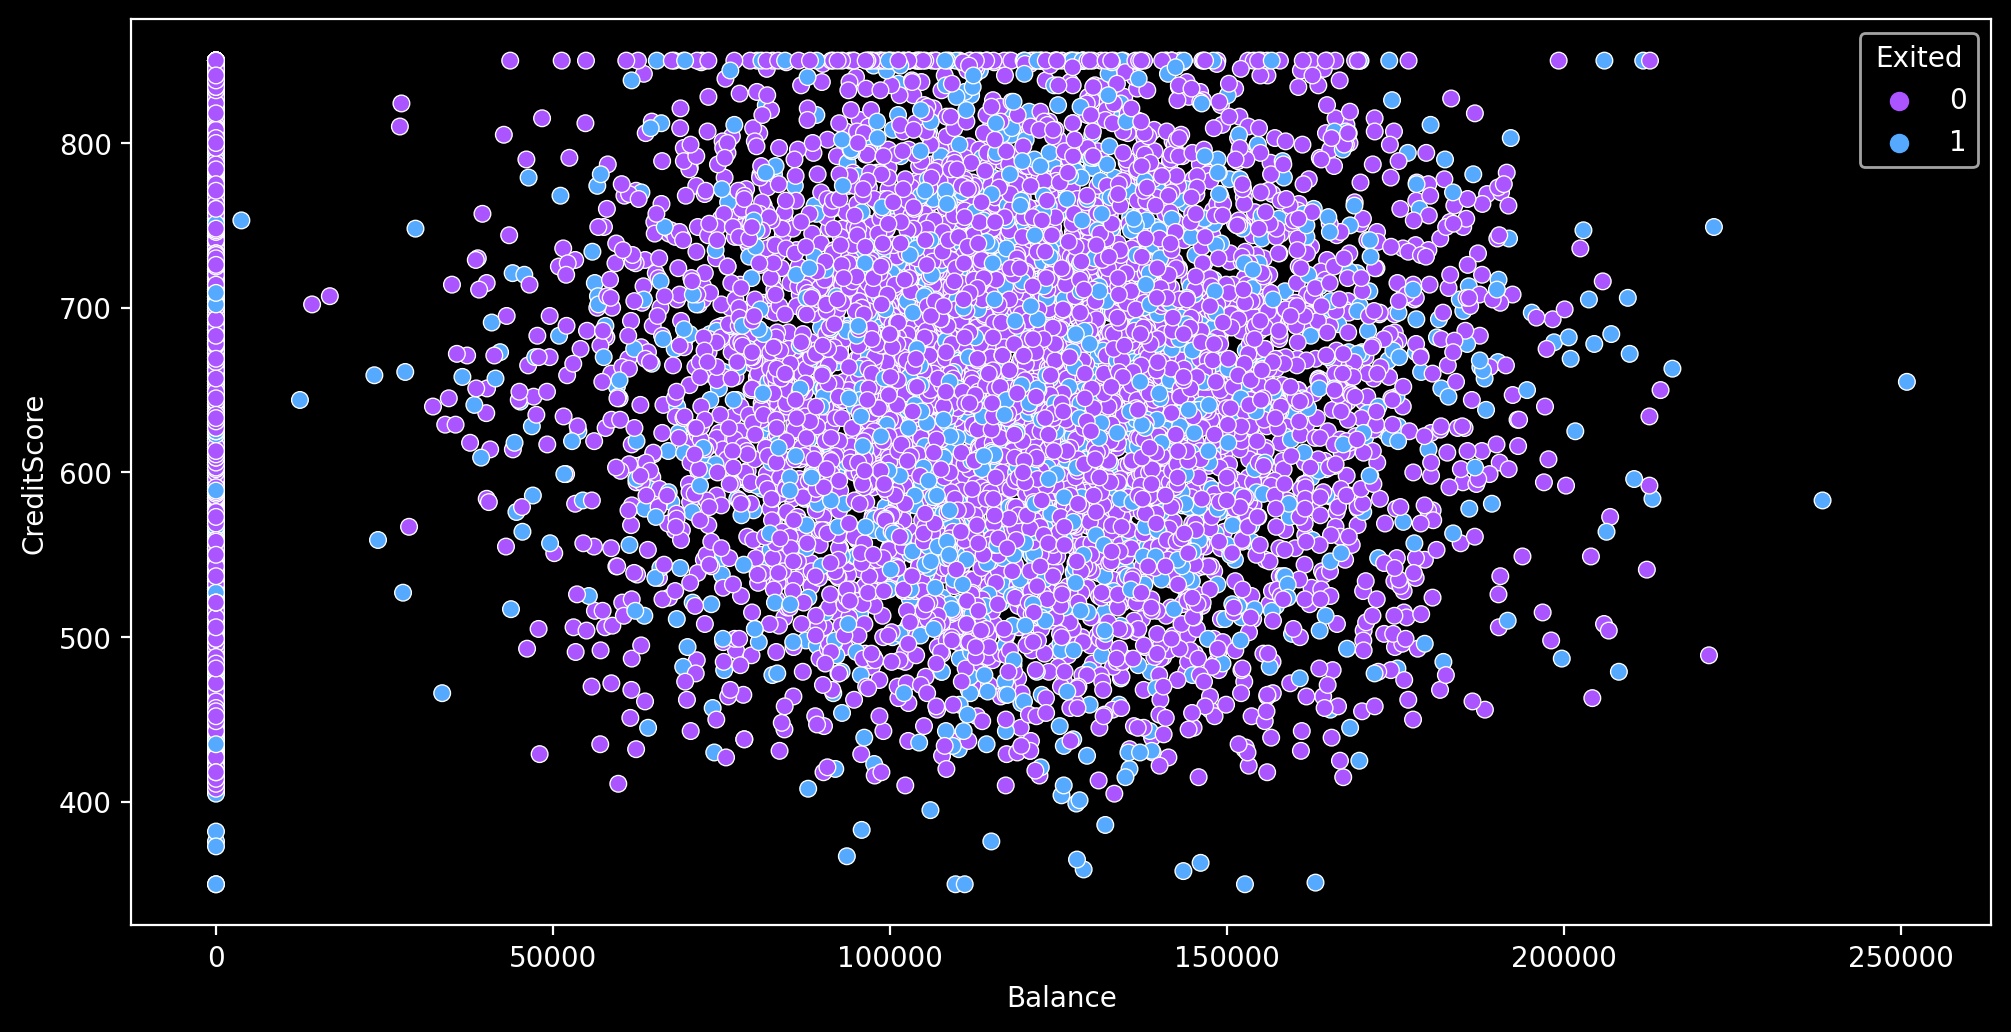

In [41]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.scatterplot('Balance', 'CreditScore',  hue = 'Exited', data = data, palette = 'cool_r')

<AxesSubplot:xlabel='Balance', ylabel='EstimatedSalary'>

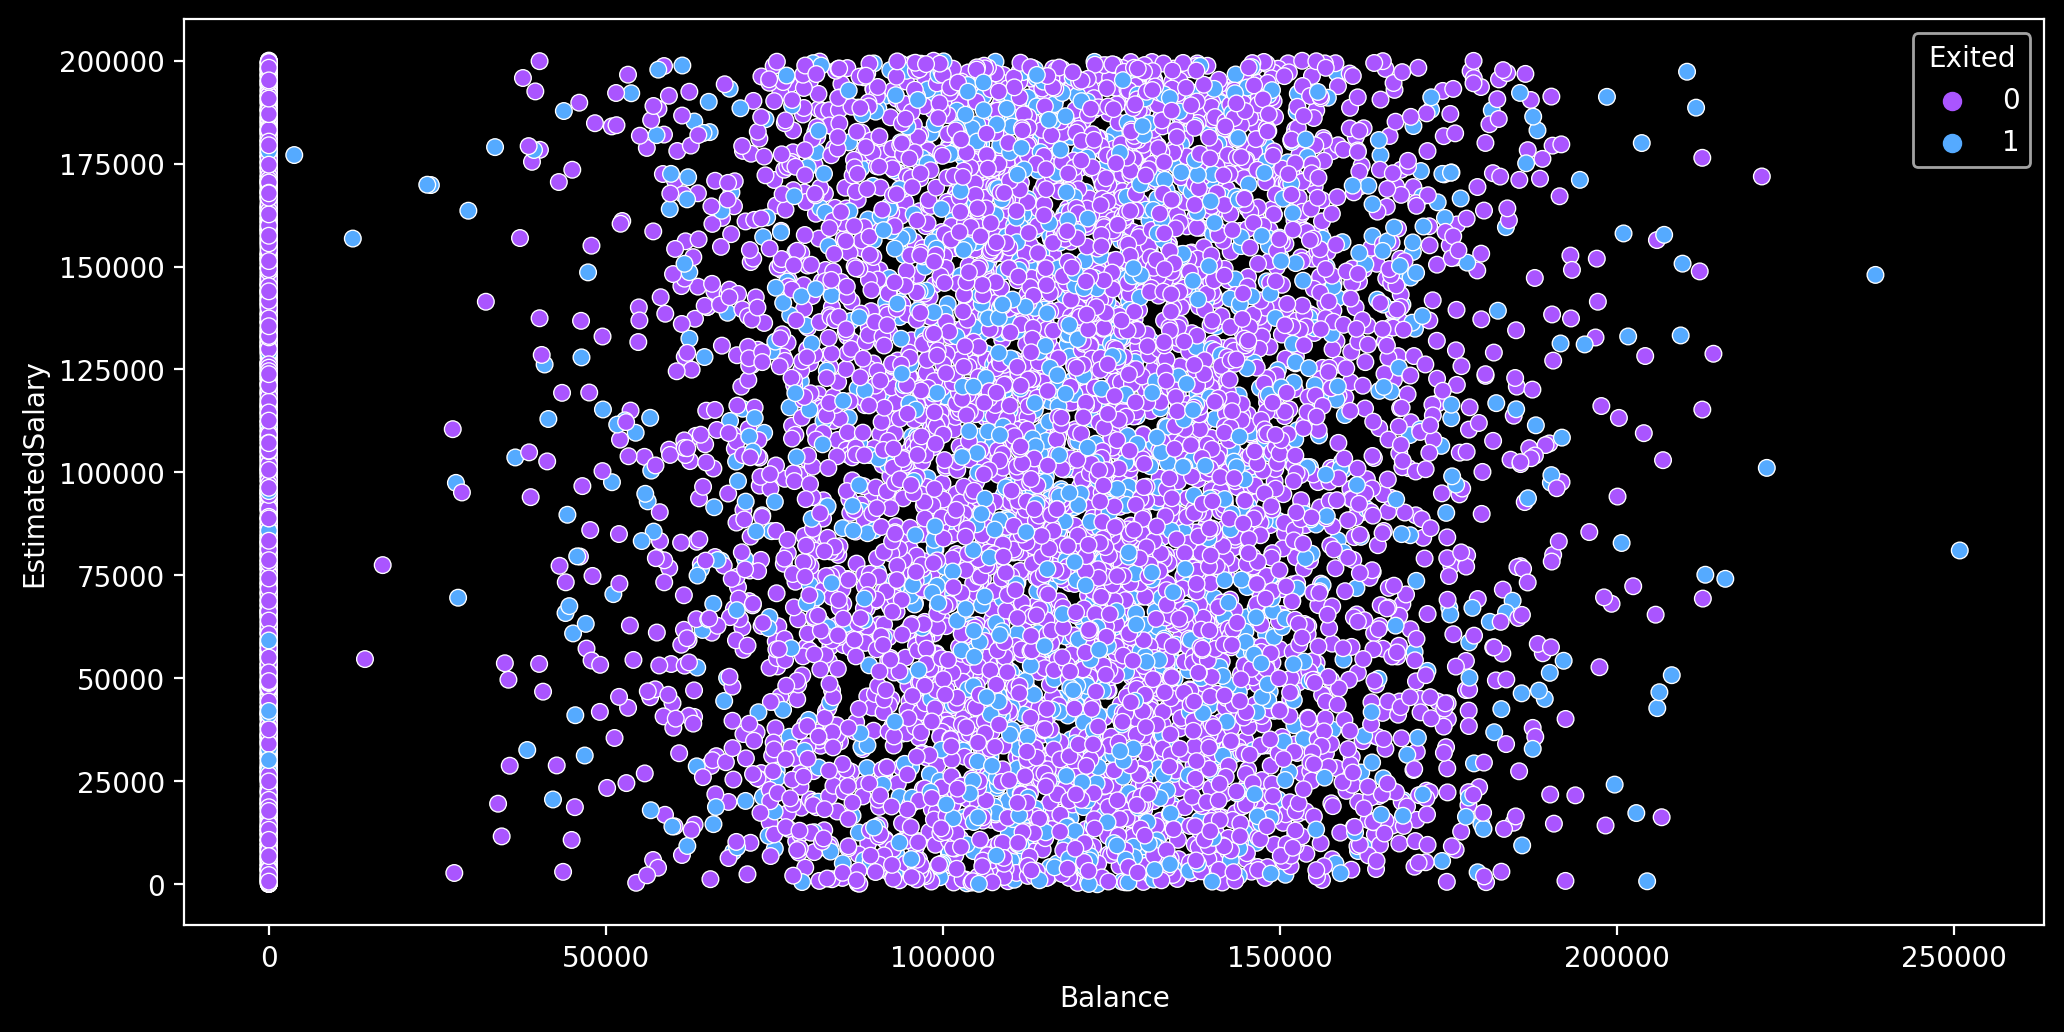

In [42]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.scatterplot('Balance', 'EstimatedSalary',  hue = 'Exited', data = data, palette = 'cool_r')

<AxesSubplot:xlabel='Point Earned', ylabel='CreditScore'>

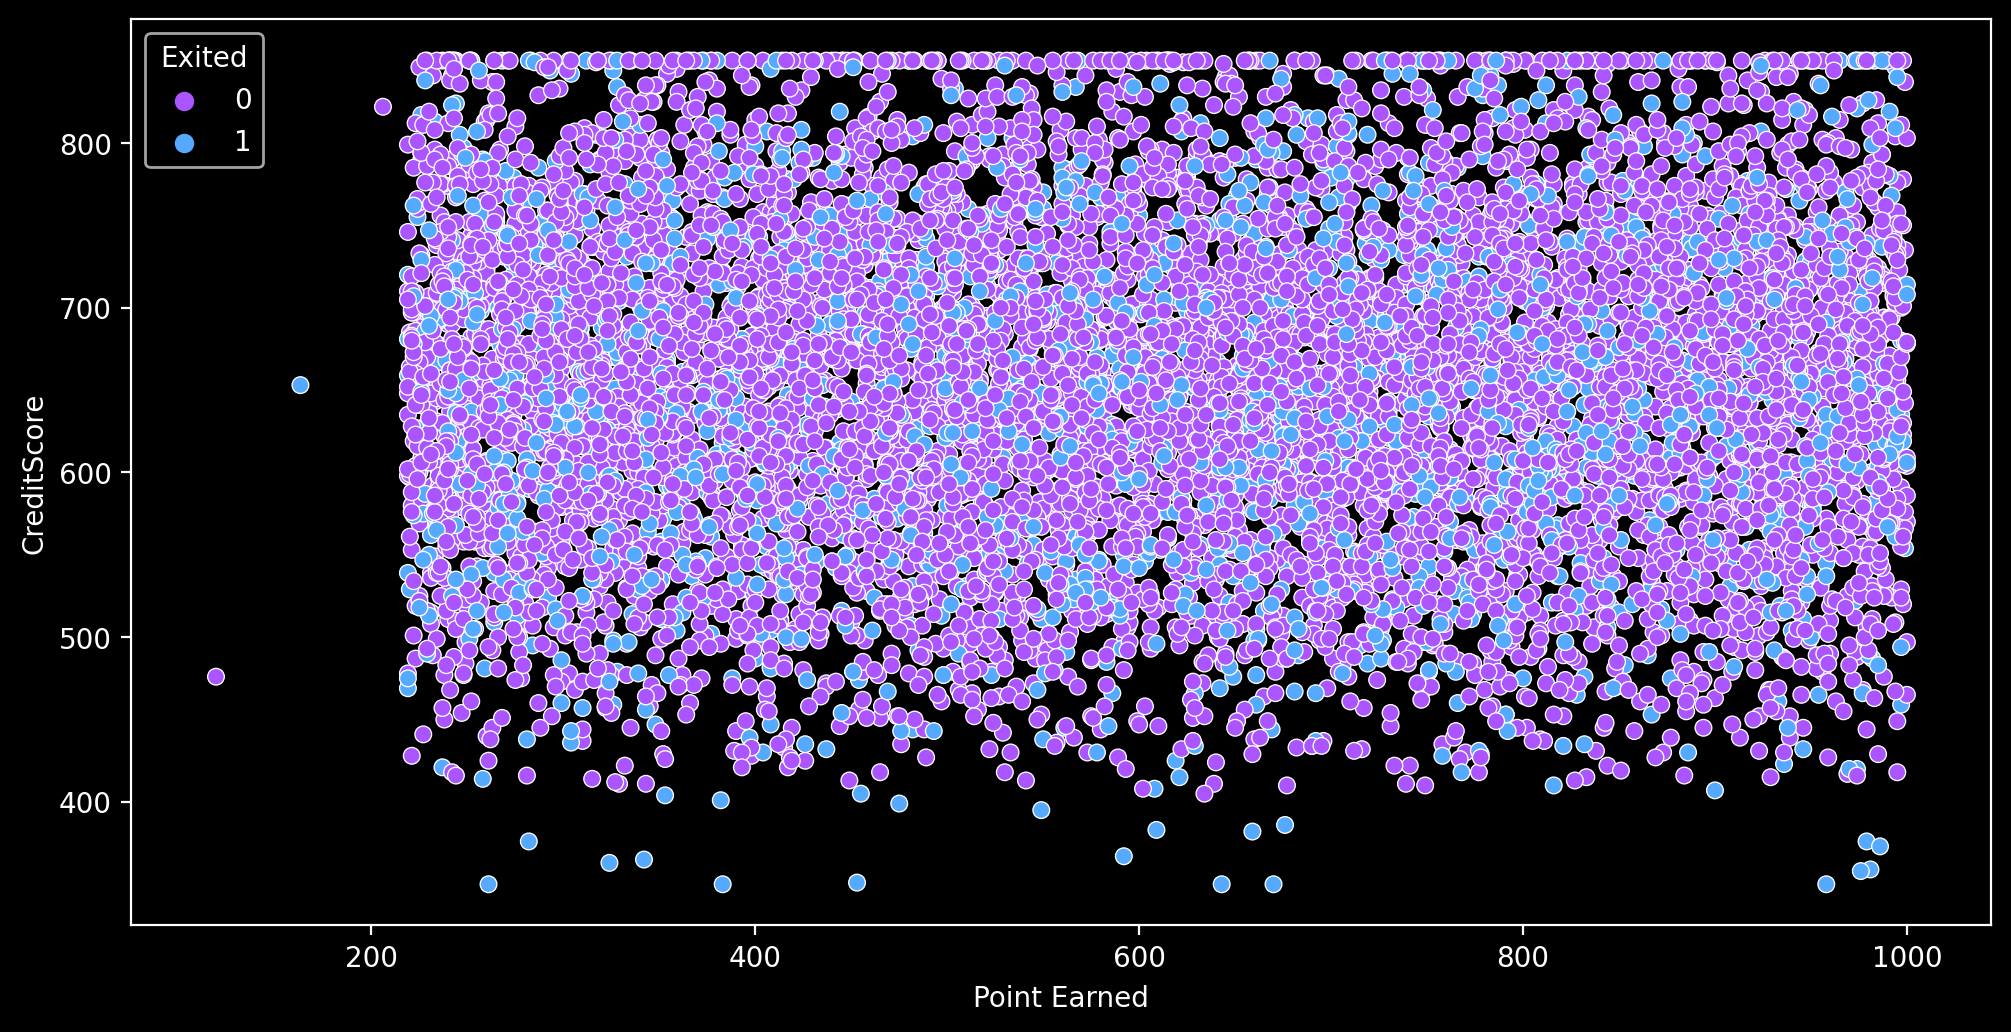

In [43]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.scatterplot('Point Earned',  'CreditScore', hue = 'Exited', data = data, palette = 'cool_r')

## Creating Dependent and Independent Features Datasets

In [44]:
X = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis = 1)
Y = data['Exited']

In [45]:
X.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Complain  Satisfaction Score  \
0          1               1        101348.88         1                   2   
1          0               1        112542.58         1                   3   
2          1               0        113931.57         1                   3   
3          0               0         93826.63         0                   5   
4          1               1         79084.10         0                   5   

  Card Type  Point Earned  
0   DIAMOND           464  
1   DIAMOND           456  
2   DIAMOND           377  
3      GOLD           350  
4      GOLD           425

In [46]:
# Encoding Categorical columns
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
cols = ['Geography', 'Gender', 'Card Type']
X[cols] = encoder.fit_transform(X[cols])

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [49]:
X[:5]

array([[-0.32622142, -0.90188624, -1.09598752,  0.29351742, -1.04175968,
        -1.22584767, -0.91158349,  0.64609167,  0.97024255,  0.02188649,
         1.97290849, -0.72113042, -1.33953263, -0.63083912],
       [-0.44003595,  1.51506738, -1.09598752,  0.19816383, -1.38753759,
         0.11735002, -0.91158349, -1.54776799,  0.97024255,  0.21653375,
         1.97290849, -0.00981614, -1.33953263, -0.66625089],
       [-1.53679418, -0.90188624, -1.09598752,  0.29351742,  1.03290776,
         1.33305335,  2.52705662,  0.64609167, -1.03067011,  0.2406869 ,
         1.97290849, -0.00981614, -1.33953263, -1.01594219],
       [ 0.50152063, -0.90188624, -1.09598752,  0.00745665, -1.38753759,
        -1.22584767,  0.80773656, -1.54776799, -1.03067011, -0.10891792,
        -0.50686588,  1.41281242, -0.44531859, -1.13545694],
       [ 2.06388377,  1.51506738, -1.09598752,  0.38887101, -1.04175968,
         0.7857279 , -0.91158349,  0.64609167,  0.97024255, -0.36527578,
        -0.50686588,  1.41

In [50]:
Y = np.array(Y).reshape(-1, 1)

In [51]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [52]:
print('Training Data Shape  : ', x_train.shape)
print('Training Label Shape : ', y_train.shape)
print('Testing Data Shape   : ', x_test.shape)
print('Testing Label Shape  : ', y_test.shape)

Training Data Shape  :  (8000, 14)
Training Label Shape :  (8000, 1)
Testing Data Shape   :  (2000, 14)
Testing Label Shape  :  (2000, 1)


## Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train, y_train)

LogisticRegression()

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [55]:
lr_pred_train = lr_classifier.predict(x_train)
lr_pred_test  = lr_classifier.predict(x_test)

print('Training Accuracy : ', accuracy_score(y_train, lr_pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, lr_pred_test))

Training Accuracy :  0.9985
Testing Accuracy  :  0.999


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [57]:
# Code for plotting Confusion Matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


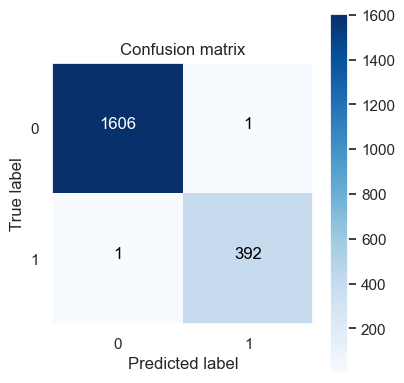

In [60]:
cm = confusion_matrix(y_test, lr_pred_test)

plt.figure(figsize = (4,4), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, [0, 1])

## Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth = 100, random_state = 15)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=100, random_state=15)

In [62]:
dt_pred_train = dt_classifier.predict(x_train)
dt_pred_test = dt_classifier.predict(x_test)

print('Training Accuracy : ', accuracy_score(y_train, dt_pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, dt_pred_test))

Training Accuracy :  1.0
Testing Accuracy  :  0.998


In [63]:
print(classification_report(y_test, dt_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       0.99      0.99      0.99       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Confusion matrix, without normalization


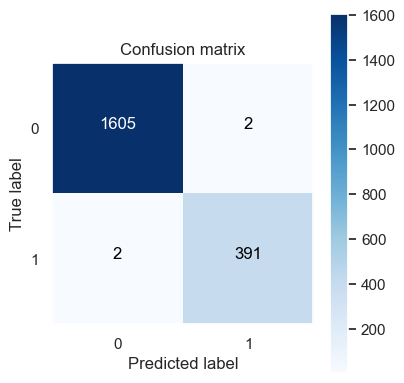

In [64]:
cm = confusion_matrix(y_test, dt_pred_test)

plt.figure(figsize = (4,4), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, [0, 1])

## Random Forest Classifier


In [66]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 150, max_depth = 50)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=150)

In [67]:
rf_pred_train = rf_classifier.predict(x_train)
rf_pred_test = rf_classifier.predict(x_test)

print('Training Accuracy : ', accuracy_score(y_train, rf_pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, rf_pred_test))

Training Accuracy :  1.0
Testing Accuracy  :  0.999


In [68]:
print(classification_report(y_test, rf_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Confusion matrix, without normalization


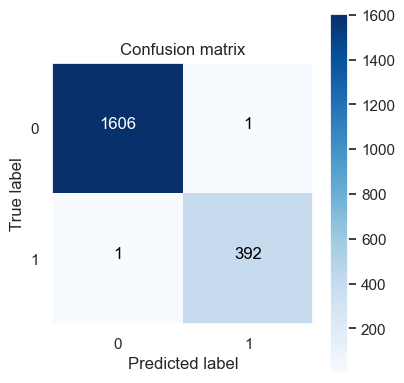

In [70]:
cm = confusion_matrix(y_test, rf_pred_test)

plt.figure(figsize = (4,4), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, [0, 1])

## XGBoost Classifier

In [71]:
from xgboost import XGBClassifier
xg_classifier = XGBClassifier(n_estimators = 250, max_depth = 150, random_state = 42)
xg_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=150, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [72]:
xg_pred_train = xg_classifier.predict(x_train)
xg_pred_test = xg_classifier.predict(x_test)

print('Training Accuracy : ', accuracy_score(y_train, xg_pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, xg_pred_test))

Training Accuracy :  1.0
Testing Accuracy  :  0.999


In [73]:
print(classification_report(y_test, xg_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Confusion matrix, without normalization


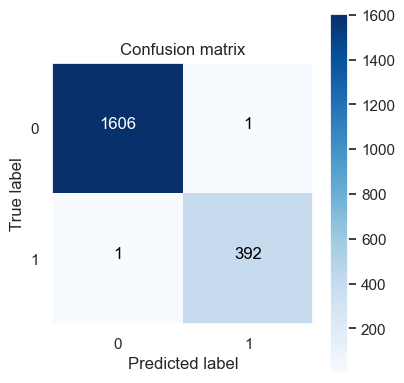

In [74]:
cm = confusion_matrix(y_test, xg_pred_test)

plt.figure(figsize = (4,4), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, [0, 1])